# Loan Default Risk Analysis Project

## Project Overview
This project analyzes a bank’s customer loan data to identify key predictors of loan default. By analyzing behavioral and financial attributes, the aim is to provide insights for reducing loan default risks. The project follows an end-to-end EDA approach, using a publicly available dataset from Kaggle (https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=previous_application.csv).

## Problem Statement
Loan defaults pose a significant risk for banks, leading to financial losses and operational challenges. Understanding the characteristics associated with defaults helps banks to mitigate risks and make informed lending decisions. This project focuses on exploring patterns and deriving insights to help banks refine customer screening and loan approval criteria.

## Project Structure and Methodology

### 1. Data Import and Basic Exploration
   - **Data Loading:** Load the loan dataset into a Jupyter Notebook environment.
   - **Initial Inspection:** Examine data structure, dimensions, and initial summary statistics.
   - **Summary Statistics:** Review distributions and detect potential outliers.

### 2. Data Cleaning and Missing Value Imputation
   - **Missing Value Detection:** Identify columns with missing data and assess their distribution.
   - **Imputation Strategies:** 
     - Mode imputation for categorical variables (e.g., occupation type).
     - Median imputation for numerical variables to retain data consistency.
   - **Standardization:** Ensure consistent formatting for numerical columns.

### 3. Feature Selection and Engineering
   - **Correlation Analysis:** Identify influential features based on their correlation with the target variable.
   - **Feature Engineering:**
     - **Debt-to-Income Ratio:** Created by dividing loan amount by income.
     - **Categorical Binning:** Grouped continuous features (e.g., income) into categories for simplified analysis.

### 4. Binning and Data Transformation
   - **Binning of Key Features:** Segmented features like `AMT_INCOME_TOTAL` and `DAYS_EMPLOYED` into bins.
   - **Variable Transformation:** Applied transformations to reduce skewness and make data more interpretable.

### 5. Exploratory Data Analysis (EDA)
   - **Univariate Analysis:** Analyzed individual distributions for variables like income and credit amount.
   - **Bivariate Analysis:** Examined relationships between variables and the target, such as income vs. loan default.
   - **Multivariate Analysis:** Utilized pair plots and correlation heatmaps to assess multicollinearity.

### 6. Behavior Observation and Insight Derivation
   - **Demographics Analysis:** Observed income, age, and gender distributions between defaulters and non-defaulters.
   - **Loan Purpose Insights:** Analyzed high-risk loan purposes and recommended specific loan types based on risk.

### 7. Data Visualization
   - **Visualization Techniques:**
     - Histograms and Density Plots for distributions of income and loan amount.
     - KDE Plots for default analysis across age and income levels.
     - Correlation Heatmaps to visualize interdependencies among features.

### 8. Insights and Recommendations
   - **Income & Default Risk:** Income levels correlate strongly with default risk, suggesting tailored loan sizes.
   - **Employment Stability:** Clients with stable employment had lower default rates, highlighting its predictive value.
   - **Loan Purpose & Risk:** Specific loan purposes (e.g., repair) showed higher default rates.

## Project Findings and Recommendations
- **Targeted Screening:** Focus on clients with stable employment, moderate income, and lower-risk occupations.
- **Loan Amount Adjustment:** Limit high loan amounts and consider annuities proportionate to income.
- **Future Considerations:** Further analysis could explore seasonal trends and industry-specific default risks.

## Summary
This project provides a comprehensive analysis of loan default risk factors, offering actionable insights for banks to refine their lending strategies. By focusing on data-driven insights, this analysis aids financial institutions in making informed decisions that reduce default risks and improve loan outcomes.



### Data Import and and basic exploration

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
app = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Feature Exploration and Selection

In [4]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app.shape

(307511, 122)

#### Missing Values Analysis

This section analyzes and visualizes missing data to ensure data completeness and quality for further processing. Key takeaways:

- **Total Missing Values**: Quantifies missing values in each column to understand data gaps.
- **Data Type Identification**: Provides the data type of each column, aiding in selecting appropriate imputation strategies.
- **Missing Data Visualization**: Plots missing values by column to highlight columns requiring data treatment.
- **Summary Statistics**: Quickly identifies columns with extensive or minimal missing data to inform preprocessing priorities.


In [6]:
# Missing Values Analysis Functions
def analyze_missing_values(df):
    """
    Analyze missing values in a dataframe and return detailed information
    
    Parameters:
    df (pandas.DataFrame): Input dataframe to analyze
    
    Returns:
    pandas.DataFrame: DataFrame containing missing value analysis
    """
    # Calculate missing values statistics
    missing_stats = pd.DataFrame({
        'Total_Missing': df.isnull().sum(),
        'Percent_Missing': df.isnull().sum() / len(df) * 100
    })
    
    # Add data type information
    missing_stats['Data_Type'] = df.dtypes
    
    # Sort by percentage of missing values in descending order
    missing_stats = missing_stats.sort_values('Percent_Missing', ascending=False)
    
    # Add a flag for columns with missing values
    missing_stats['Has_Missing'] = missing_stats['Total_Missing'] > 0
    
    return missing_stats

def plot_missing_values(missing_stats, threshold=0):
    """
    Create a visualization of missing values
    
    Parameters:
    missing_stats (pandas.DataFrame): Output from analyze_missing_values function
    threshold (float): Only plot columns with missing values above this percentage
    """
    # Filter based on threshold
    plot_data = missing_stats[missing_stats['Percent_Missing'] > threshold]
    
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(plot_data)), plot_data['Percent_Missing'])
    plt.xticks(range(len(plot_data)), plot_data.index, rotation=90)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values by Column')
    plt.tight_layout()
    
    return plt

# Function to get a summary of missing values
def get_missing_summary(missing_stats):
    """
    Generate a summary of missing values analysis
    
    Parameters:
    missing_stats (pandas.DataFrame): Output from analyze_missing_values function
    
    Returns:
    dict: Summary statistics about missing values
    """
    return {
        'columns_with_missing': missing_stats['Has_Missing'].sum(),
        'columns_without_missing': (~missing_stats['Has_Missing']).sum(),
        'total_columns': len(missing_stats),
        'columns_over_50_percent': (missing_stats['Percent_Missing'] > 50).sum(),
        'columns_over_30_percent': (missing_stats['Percent_Missing'] > 30).sum(),
        'columns_under_5_percent': (missing_stats['Percent_Missing'] <= 5).sum()
    }

Missing Values Summary:
Total columns: 122
Columns with missing values: 67
Columns without missing values: 55
Columns with >50% missing: 41
Columns with >30% missing: 50
Columns with ≤5% missing: 65

Detailed view of columns with missing values:
                              Total_Missing  Percent_Missing Data_Type  Has_Missing
COMMONAREA_MEDI                      214865        69.872297   float64         True
COMMONAREA_AVG                       214865        69.872297   float64         True
COMMONAREA_MODE                      214865        69.872297   float64         True
NONLIVINGAPARTMENTS_MODE             213514        69.432963   float64         True
NONLIVINGAPARTMENTS_AVG              213514        69.432963   float64         True
NONLIVINGAPARTMENTS_MEDI             213514        69.432963   float64         True
FONDKAPREMONT_MODE                   210295        68.386172    object         True
LIVINGAPARTMENTS_MODE                210199        68.354953   float64         Tru

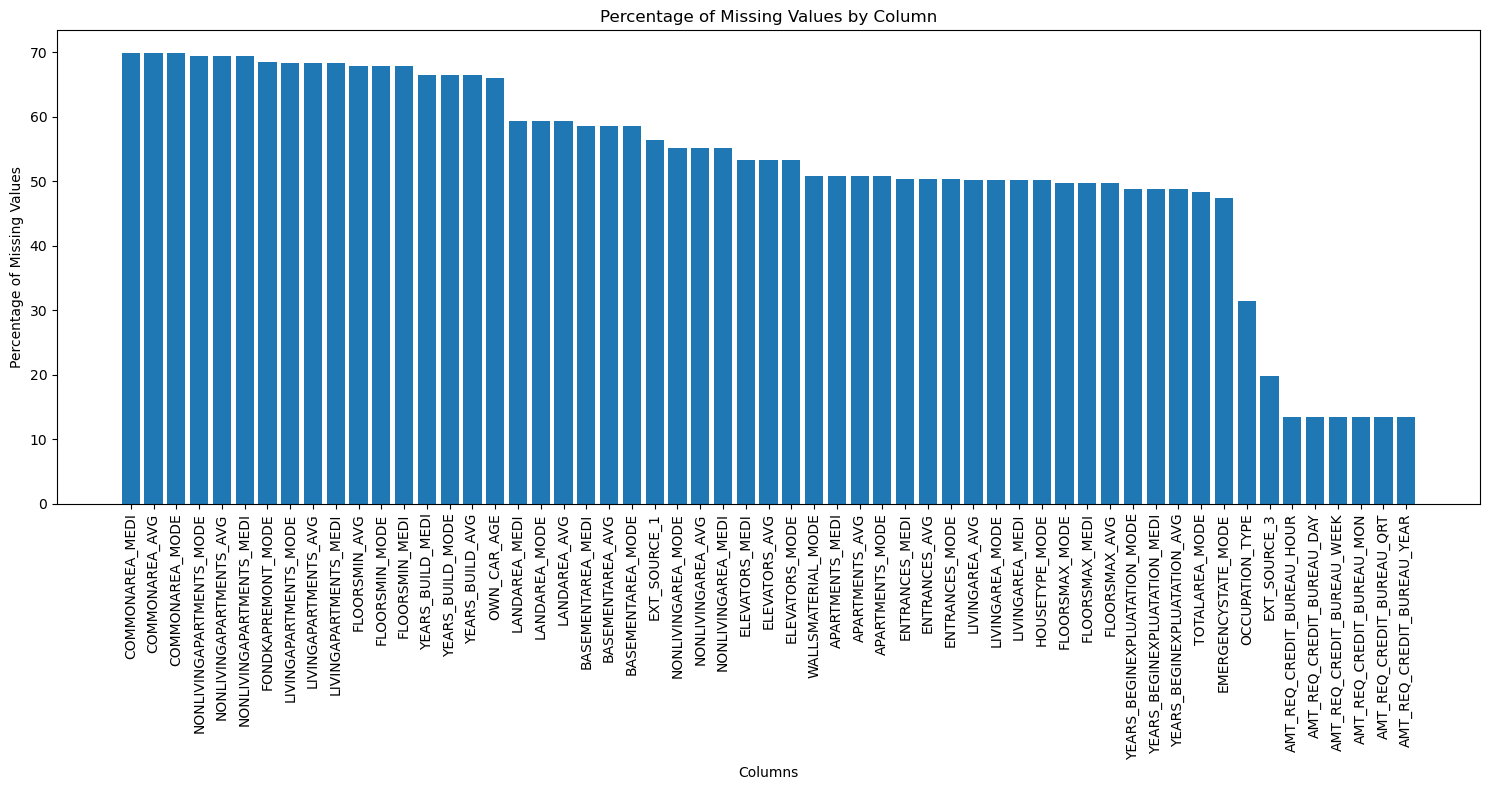

In [7]:
# Analyze missing values in the application data
missing_analysis = analyze_missing_values(app)

# Print summary statistics
summary = get_missing_summary(missing_analysis)

print("Missing Values Summary:")
print(f"Total columns: {summary['total_columns']}")
print(f"Columns with missing values: {summary['columns_with_missing']}")
print(f"Columns without missing values: {summary['columns_without_missing']}")
print(f"Columns with >50% missing: {summary['columns_over_50_percent']}")
print(f"Columns with >30% missing: {summary['columns_over_30_percent']}")
print(f"Columns with ≤5% missing: {summary['columns_under_5_percent']}")

# Display columns with missing values and their percentages
print("\nDetailed view of columns with missing values:")
print(missing_analysis[missing_analysis['Has_Missing']].to_string())

# Create visualization
plot_missing_values(missing_analysis, threshold=5)
plt.show()

#### Missing Values Export
- **Purpose:** Exporting missing values data to Excel enables a clear, shareable reference for data quality.
- **File Path:** save file to the desired path for offline analysis.
- **Outcome:** The Excel file captures all columns' missing value counts and types, supporting transparency and data cleaning planning.

In [8]:
# Get the missing values analysis
missing_info = analyze_missing_values(app)

# Export to Excel
# file_path = r"C:\Users\DELL\Desktop\HexSofwares Internship\Task 1\missing_info.xlsx"
# missing_info.to_excel(file_path)

# print(f"File has been exported successfully to: {file_path}")

File has been exported successfully to: C:\Users\DELL\Desktop\HexSofwares Internship\Task 1\missing_info2.xlsx


#### High Missing Value Columns Removal
- **Purpose:** Optimize data quality by removing columns with excessive missing values (≥40%).
- **Outcome:** Retain only columns with substantial data, enhancing analysis reliability.
- **Columns Removed:** List all columns with ≥40% missing values for transparency and reference.

In [9]:
# Calculate the threshold based on dataset size
threshold = 40  # 40% threshold
rows_in_dataset = len(app)
missing_threshold = (threshold/100) * rows_in_dataset

# Create new dataframe without columns having ≥40% missing values
cleaned_application_data = app.loc[:, app.isnull().sum() < missing_threshold]

# Check the shapes to understand how many columns were removed
print("Original dataset shape:", app.shape)
print("Cleaned dataset shape:", cleaned_application_data.shape)

# Calculate how many columns were removed
columns_removed = app.shape[1] - cleaned_application_data.shape[1]
print(f"\nNumber of columns removed: {columns_removed}")

# Optionally, you can see which columns were removed
removed_columns = app.columns[app.isnull().sum() >= missing_threshold].tolist()
print("\nColumns removed due to ≥40% missing values:")
for col in removed_columns:
    missing_percentage = (app[col].isnull().sum() / len(app) * 100).round(2)
    print(f"- {col}: {missing_percentage}% missing")

Original dataset shape: (307511, 122)
Cleaned dataset shape: (307511, 73)

Number of columns removed: 49

Columns removed due to ≥40% missing values:
- OWN_CAR_AGE: 65.99% missing
- EXT_SOURCE_1: 56.38% missing
- APARTMENTS_AVG: 50.75% missing
- BASEMENTAREA_AVG: 58.52% missing
- YEARS_BEGINEXPLUATATION_AVG: 48.78% missing
- YEARS_BUILD_AVG: 66.5% missing
- COMMONAREA_AVG: 69.87% missing
- ELEVATORS_AVG: 53.3% missing
- ENTRANCES_AVG: 50.35% missing
- FLOORSMAX_AVG: 49.76% missing
- FLOORSMIN_AVG: 67.85% missing
- LANDAREA_AVG: 59.38% missing
- LIVINGAPARTMENTS_AVG: 68.35% missing
- LIVINGAREA_AVG: 50.19% missing
- NONLIVINGAPARTMENTS_AVG: 69.43% missing
- NONLIVINGAREA_AVG: 55.18% missing
- APARTMENTS_MODE: 50.75% missing
- BASEMENTAREA_MODE: 58.52% missing
- YEARS_BEGINEXPLUATATION_MODE: 48.78% missing
- YEARS_BUILD_MODE: 66.5% missing
- COMMONAREA_MODE: 69.87% missing
- ELEVATORS_MODE: 53.3% missing
- ENTRANCES_MODE: 50.35% missing
- FLOORSMAX_MODE: 49.76% missing
- FLOORSMIN_MODE: 

#### FLAG Columns Identification
- **Purpose:** Isolate FLAG columns, which indicate binary characteristics within the dataset.
- **Outcome:** FLAG columns listed for potential analysis of binary patterns in customer behavior or attributes.

In [10]:
# Investigate all the columns that start with FLAG and create a list of those columns
flag_col_list = [col for col in cleaned_application_data.columns if col.startswith('FLAG')]

# Print the list and count
print(f"Number of FLAG columns: {len(flag_col_list)}")
print("\nList of FLAG columns:")
for col in flag_col_list:
    print(f"- {col}")
    
print("\nView of first 5 rows of the listed columns")
cleaned_application_data[flag_col_list].head()

Number of FLAG columns: 28

List of FLAG columns:
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- FLAG_MOBIL
- FLAG_EMP_PHONE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- FLAG_DOCUMENT_2
- FLAG_DOCUMENT_3
- FLAG_DOCUMENT_4
- FLAG_DOCUMENT_5
- FLAG_DOCUMENT_6
- FLAG_DOCUMENT_7
- FLAG_DOCUMENT_8
- FLAG_DOCUMENT_9
- FLAG_DOCUMENT_10
- FLAG_DOCUMENT_11
- FLAG_DOCUMENT_12
- FLAG_DOCUMENT_13
- FLAG_DOCUMENT_14
- FLAG_DOCUMENT_15
- FLAG_DOCUMENT_16
- FLAG_DOCUMENT_17
- FLAG_DOCUMENT_18
- FLAG_DOCUMENT_19
- FLAG_DOCUMENT_20
- FLAG_DOCUMENT_21

View of first 5 rows of the listed columns


,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### FLAG Columns and TARGET Subset Creation
- **Purpose:** Focus analysis on binary indicators (`FLAG` columns) and the `TARGET` variable to explore their relationship with loan default status.
- **Outcome:** Create a subset containing only `FLAG` columns and the `TARGET` column for targeted analysis of binary features.
- **Details:** Confirm the shape of the new DataFrame and display the first few rows for validation.


In [11]:
# Create list of columns we want (FLAG columns + TARGET)
columns_needed = flag_col_list + ['TARGET']

# Create new dataframe with selected columns
flag_target_columns = cleaned_application_data[columns_needed]

# View the head of the new dataframe
print("Shape of flag_target_columns:", flag_target_columns.shape)
print("\nFirst few rows of the dataframe:")
flag_target_columns.head()

Shape of flag_target_columns: (307511, 29)

First few rows of the dataframe:


,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### FLAG Features vs TARGET Relationship Analysis
- **Purpose:** Investigate the relationship between each `FLAG` feature and `TARGET` (loan default), focusing on how these binary characteristics influence default likelihood.
- **Outcome:** Visualizations and statistical insights provide a clearer view of which flags correlate with higher or lower default rates.
- **Observations:** For each `FLAG` feature, distributions and default rates highlight potential risk indicators useful for profiling at-risk clients.

C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\1446946987.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


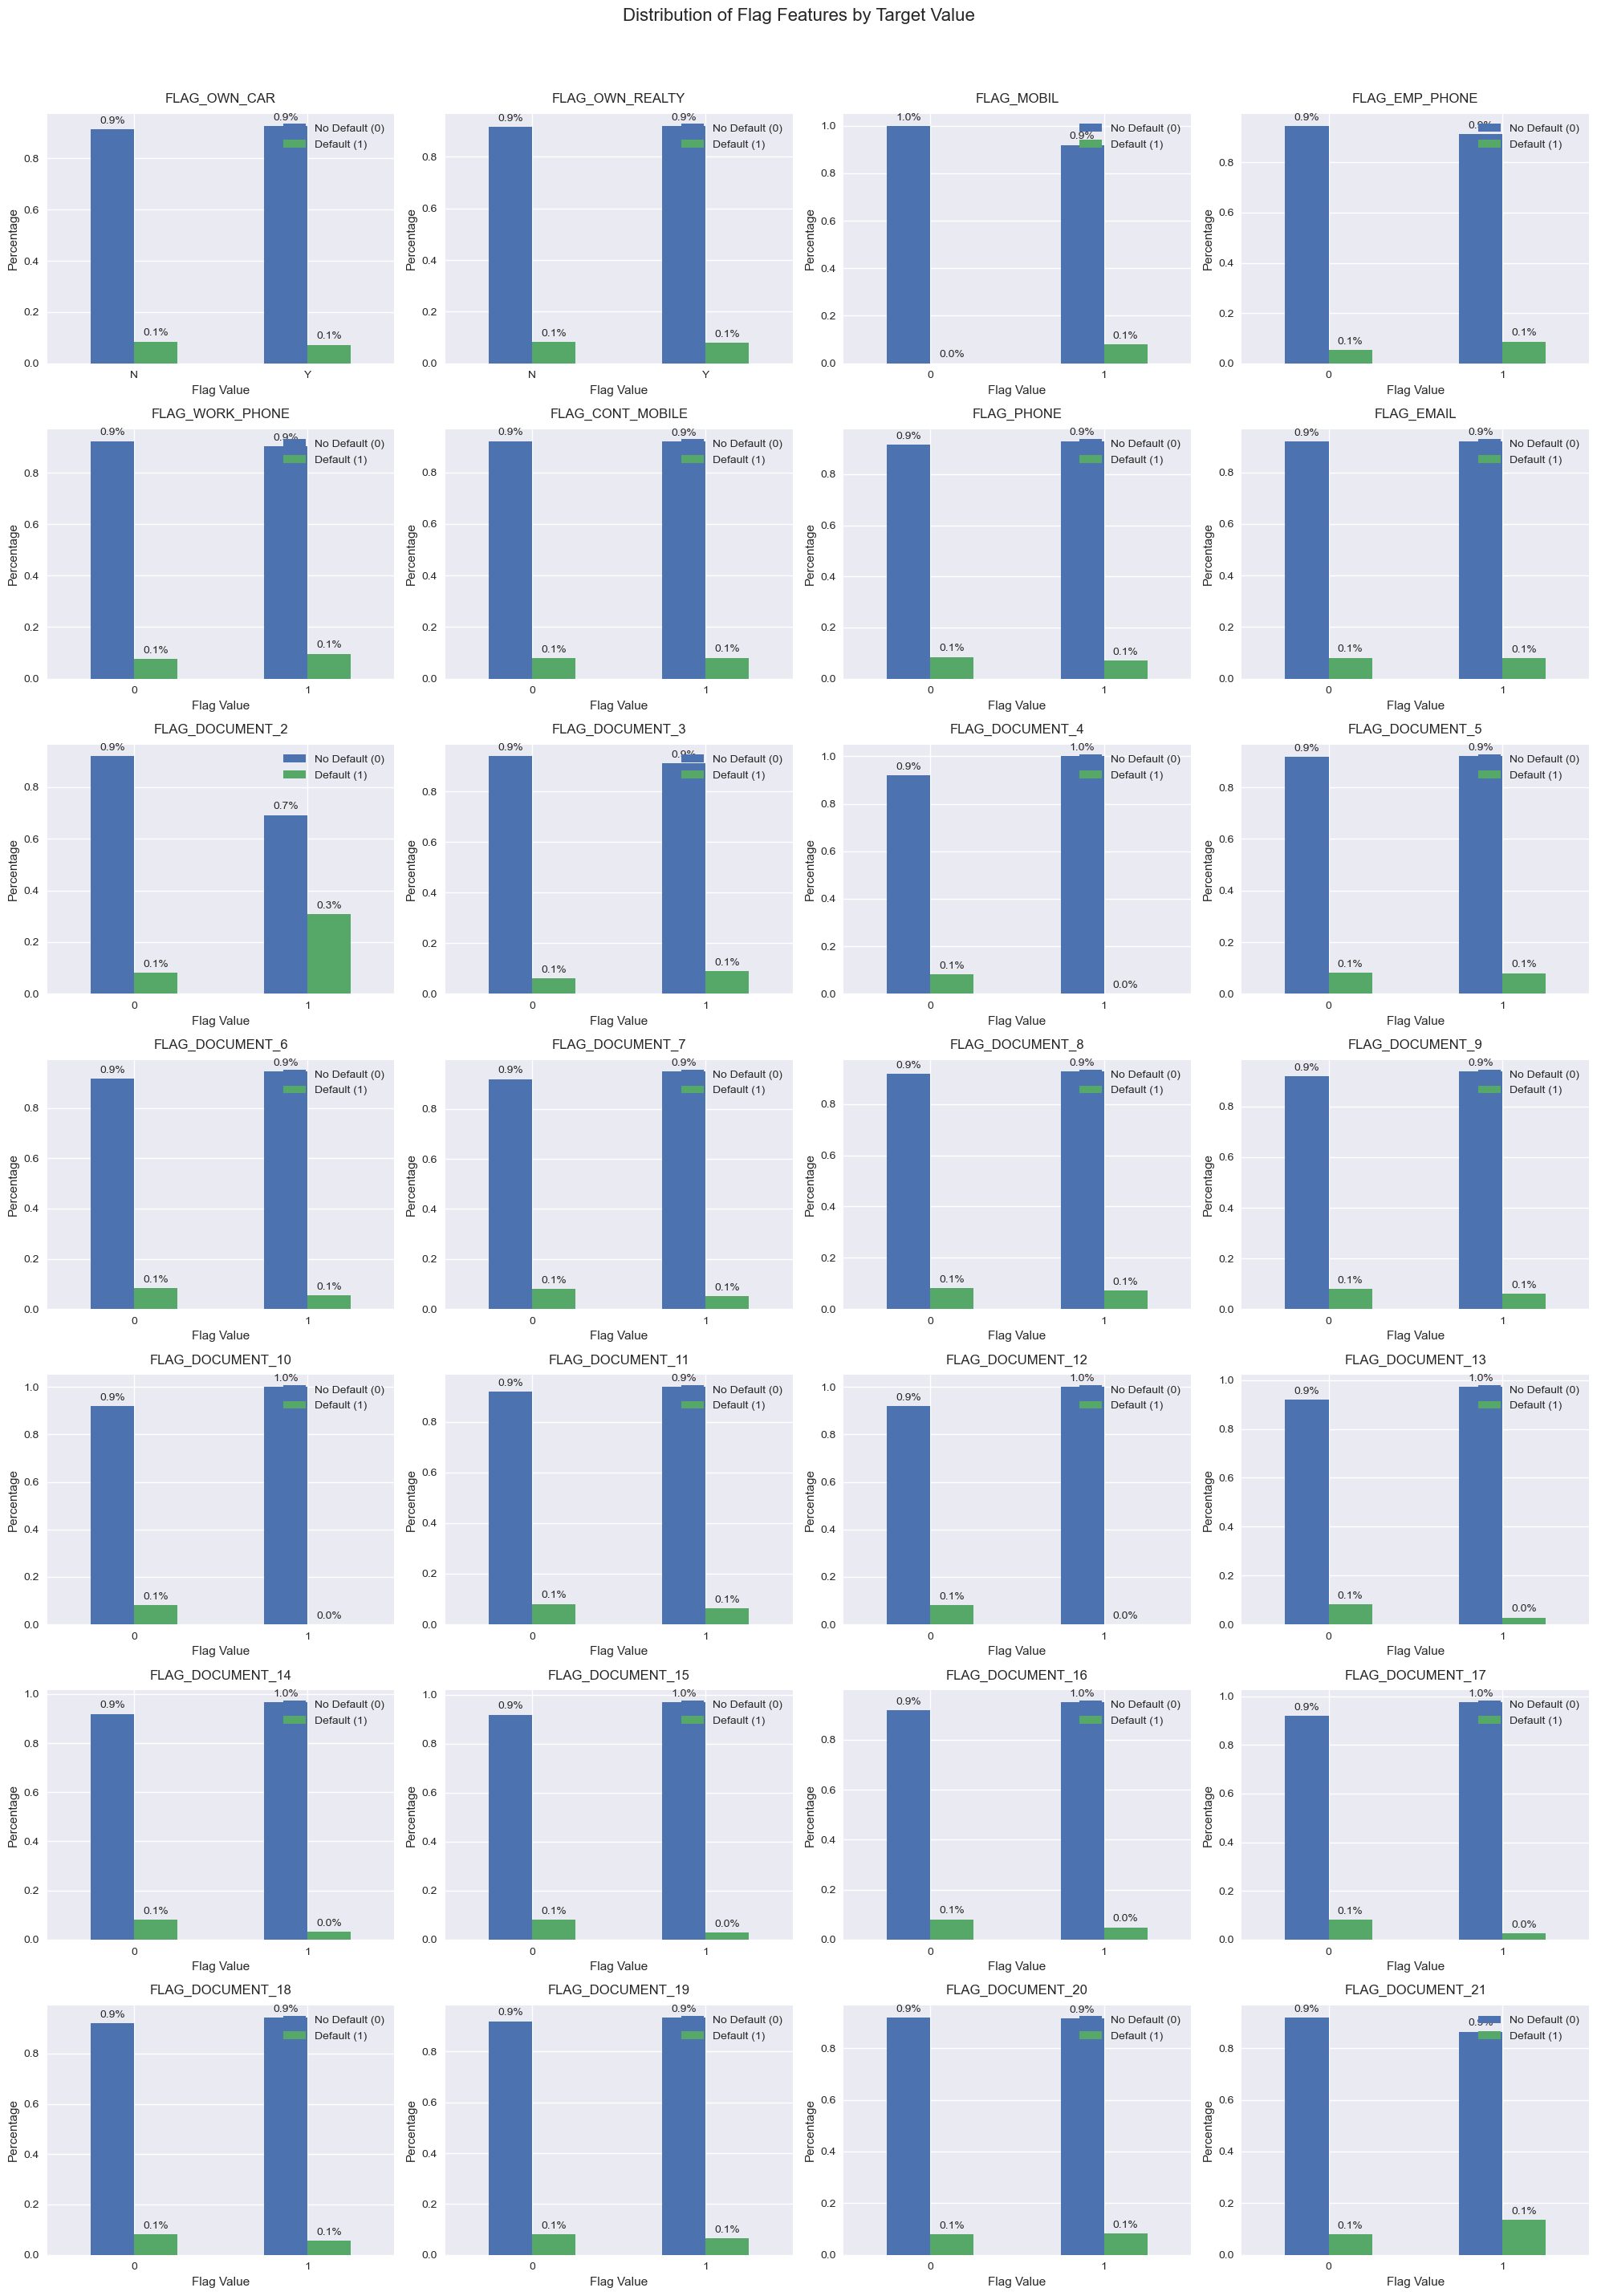


Statistical Insights:

FLAG_OWN_CAR:
Flag value N: 8.50% default rate
Flag value Y: 7.24% default rate

FLAG_OWN_REALTY:
Flag value N: 8.32% default rate
Flag value Y: 7.96% default rate

FLAG_MOBIL:
Flag value 0: 0.00% default rate
Flag value 1: 8.07% default rate

FLAG_EMP_PHONE:
Flag value 0: 5.40% default rate
Flag value 1: 8.66% default rate

FLAG_WORK_PHONE:
Flag value 0: 7.69% default rate
Flag value 1: 9.63% default rate

FLAG_CONT_MOBILE:
Flag value 0: 7.84% default rate
Flag value 1: 8.07% default rate

FLAG_PHONE:
Flag value 0: 8.48% default rate
Flag value 1: 7.04% default rate

FLAG_EMAIL:
Flag value 0: 8.08% default rate
Flag value 1: 7.88% default rate

FLAG_DOCUMENT_2:
Flag value 0: 8.07% default rate
Flag value 1: 30.77% default rate

FLAG_DOCUMENT_3:
Flag value 0: 6.18% default rate
Flag value 1: 8.84% default rate

FLAG_DOCUMENT_4:
Flag value 0: 8.07% default rate
Flag value 1: 0.00% default rate

FLAG_DOCUMENT_5:
Flag value 0: 8.07% default rate
Flag value 1: 8.00%

In [12]:
def plot_flag_target_relationships(data, flag_columns, n_cols=4):
    """
    Plot the relationship between flag features and target variable
    
    Parameters:
    data (pandas.DataFrame): DataFrame containing flag features and target
    flag_columns (list): List of flag column names
    n_cols (int): Number of columns in the subplot grid
    """
    # Calculate number of rows needed
    n_rows = (len(flag_columns) + n_cols - 1) // n_cols
    
    # Create figure and subplots
    plt.style.use('seaborn')
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
    fig.suptitle('Distribution of Flag Features by Target Value', fontsize=16, y=1.02)
    
    # Flatten axes array for easier iteration
    axes_flat = axes.flatten()
    
    # Plot each feature
    for idx, feature in enumerate(flag_columns):
        if feature != 'TARGET':
            # Calculate percentages for each category
            props = data.groupby(feature)['TARGET'].value_counts(normalize=True).unstack()
            
            # Create bar plot
            ax = axes_flat[idx]
            props.plot(kind='bar', ax=ax)
            
            # Customize plot
            ax.set_title(f'{feature}', pad=10)
            ax.set_xlabel('Flag Value')
            ax.set_ylabel('Percentage')
            ax.legend(['No Default (0)', 'Default (1)'])
            
            # Add percentage labels on bars
            for i in ax.containers:
                ax.bar_label(i, fmt='%.1f%%', padding=3)
                
            # Rotate x-axis labels
            ax.tick_params(axis='x', rotation=0)
            
    # Remove empty subplots if any
    for idx in range(len(flag_columns), len(axes_flat)):
        fig.delaxes(axes_flat[idx])
    
    # Adjust layout
    plt.tight_layout()
    return fig

# Create the visualization
fig = plot_flag_target_relationships(flag_target_columns, flag_col_list)
plt.show()

# Calculate and print some statistical insights
print("\nStatistical Insights:")
for flag in flag_col_list:
    # Calculate default rates for each flag value
    default_rates = flag_target_columns.groupby(flag)['TARGET'].mean() * 100
    print(f"\n{flag}:")
    for flag_value, default_rate in default_rates.items():
        print(f"Flag value {flag_value}: {default_rate:.2f}% default rate")

#### Correlation Analysis and Default Rates of Selected FLAG Features
- **Purpose:** Assess correlations between selected `FLAG` features and the `TARGET` variable to identify potential indicators of loan default.
- **Outcome:** Correlation heatmap and calculated default rates for each `FLAG` feature value provide insight into which characteristics may signal higher default risk.
- **Statistical Findings:** Default rates by flag value reveal default likelihood for different client characteristics, helping refine risk assessment and client profiling.

Correlations with TARGET variable:
TARGET              1.000000
FLAG_EMP_PHONE      0.045982
FLAG_WORK_PHONE     0.028524
FLAG_MOBIL          0.000534
FLAG_CONT_MOBILE    0.000370
FLAG_EMAIL         -0.001758
FLAG_OWN_REALTY    -0.006148
FLAG_OWN_CAR       -0.021851
FLAG_PHONE         -0.023806
Name: TARGET, dtype: float64


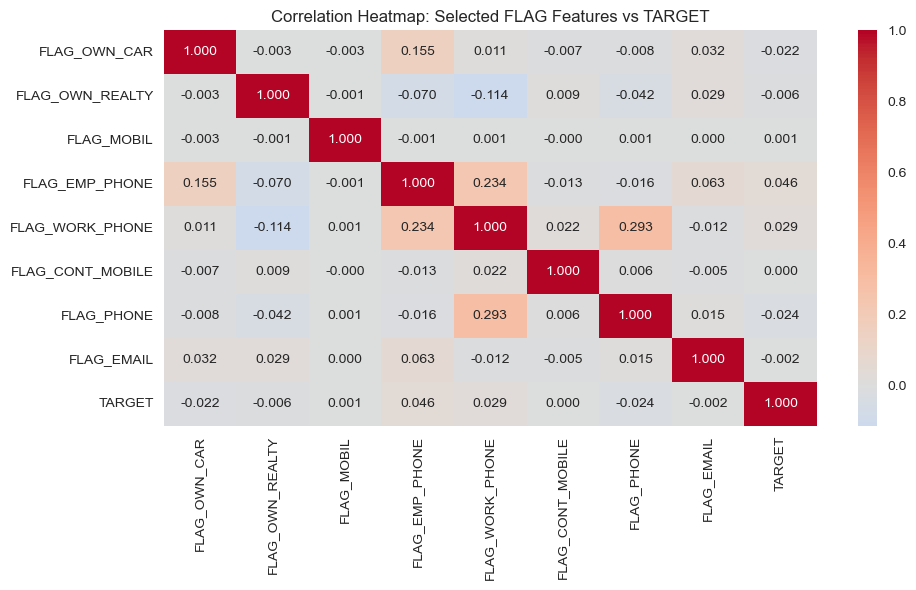

In [13]:
# Create a list of the specific flag features we want to analyze
selected_flags = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 
                 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']

# Create a dataframe with only these features
selected_flag_df = cleaned_application_data[selected_flags].copy()

# Convert Y/N to 1/0 for relevant columns
for col in selected_flag_df.columns:
    if selected_flag_df[col].dtype == 'object':
        selected_flag_df[col] = selected_flag_df[col].map({'Y': 1, 'N': 0})

# Calculate correlations
correlations = selected_flag_df.corr()['TARGET'].sort_values(ascending=False)

# Print correlations with TARGET
print("Correlations with TARGET variable:")
print(correlations)

# Create a heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(selected_flag_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation Heatmap: Selected FLAG Features vs TARGET')
plt.tight_layout()
plt.show()

#### Removal of FLAG Columns
- **Purpose:** Exclude `FLAG` columns to focus on non-binary features for further analysis.
- **Outcome:** Reduced dataset size by removing columns with binary flags, retaining only essential features for deeper exploration.
- **Verification:** Ensured all specified `FLAG` columns were removed, confirming a refined dataset for advanced analysis.

In [14]:
# Create new dataframe without the flag columns
# Note: We keep 'TARGET' as it's typically needed for analysis
cleaned_application_data = cleaned_application_data.drop(columns=flag_col_list)

# Print shape to confirm the removal
print("Dataset shape after removing flag columns:", cleaned_application_data.shape)

# Optionally, verify the columns were removed
remaining_flags = [col for col in flag_col_list if col in cleaned_application_data.columns]
if not remaining_flags:
    print("\nAll flag columns successfully removed.")
else:
    print("\nWarning: The following flag columns are still present:", remaining_flags)
    
print("\nCleaned dataframe without the flag columns:")
cleaned_application_data.head()

Dataset shape after removing flag columns: (307511, 45)

All flag columns successfully removed.

Cleaned dataframe without the flag columns:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Analysis of External Source Features
- **Purpose:** Evaluate the relationship between external data sources (`EXT_SOURCE_2`, `EXT_SOURCE_3`) and `TARGET` to assess their predictive value.
- **Correlation Analysis:**
  - Calculate correlations between external source features and `TARGET` to understand their individual impacts on default probability.
  - Incorporate a heatmap visualization to provide an overview of feature interactions with `TARGET`.
- **Statistical Summary:** 
  - Display statistical summaries for `EXT_SOURCE_2` and `EXT_SOURCE_3` to understand data distribution and potential outliers.
- **Quartile Analysis:** 
  - Group external source values into quartiles, then computed default rates per quartile.
  - Insights from quartile-based analysis can reveal whether higher or lower values in these features correlate with default risk.

Correlations with TARGET variable:
TARGET          1.000000
EXT_SOURCE_2   -0.160472
EXT_SOURCE_3   -0.178919
Name: TARGET, dtype: float64


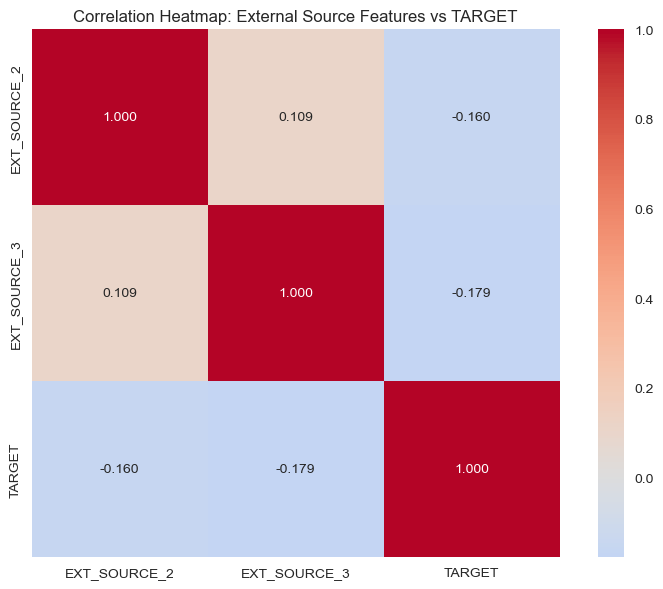


Statistical Summary for External Source Features:
       EXT_SOURCE_2   EXT_SOURCE_3         TARGET
count  3.068510e+05  246546.000000  307511.000000
mean   5.143927e-01       0.510853       0.080729
std    1.910602e-01       0.194844       0.272419
min    8.173617e-08       0.000527       0.000000
25%    3.924574e-01       0.370650       0.000000
50%    5.659614e-01       0.535276       0.000000
75%    6.636171e-01       0.669057       0.000000
max    8.549997e-01       0.896010       1.000000

Default rates by EXT_SOURCE_2 quartiles:
                            mean  count
EXT_SOURCE_2_quartile                  
Q1                     14.294280  76716
Q2                      8.174945  76710
Q3                      6.019840  76713
Q4                      3.803838  76712

Default rates by EXT_SOURCE_3 quartiles:
                            mean  count
EXT_SOURCE_3_quartile                  
Q1                     15.056539  61993
Q2                      7.510100  61384
Q3             

C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\3965638934.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = ext_source_df.groupby(f'{col}_quartile')['TARGET'].agg(['mean', 'count'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\3965638934.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = ext_source_df.groupby(f'{col}_quartile')['TARGET'].agg(['mean', 'count'])


In [15]:
# Select the columns we want to analyze
ext_source_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']
ext_source_df = cleaned_application_data[ext_source_cols].copy()

# Calculate correlations
correlations = ext_source_df.corr()['TARGET'].sort_values(ascending=False)

# Print correlations with TARGET
print("Correlations with TARGET variable:")
print(correlations)

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(ext_source_df.corr(), 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.3f',  # Format numbers to 3 decimal places
            square=True)  # Make cells square

plt.title('Correlation Heatmap: External Source Features vs TARGET')
plt.tight_layout()
plt.show()

# Additional statistical summary
print("\nStatistical Summary for External Source Features:")
print(ext_source_df.describe())

# Calculate default rates by EXT_SOURCE quartiles
for col in ['EXT_SOURCE_2', 'EXT_SOURCE_3']:
    print(f"\nDefault rates by {col} quartiles:")
    # Create quartiles
    ext_source_df[f'{col}_quartile'] = pd.qcut(ext_source_df[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Calculate default rate by quartile
    default_rates = ext_source_df.groupby(f'{col}_quartile')['TARGET'].agg(['mean', 'count'])
    default_rates['mean'] = default_rates['mean'] * 100  # Convert to percentage
    
    print(default_rates)

#### Removal of External Source Columns
- **Purpose:** Streamline dataset by removing `EXT_SOURCE_2` and `EXT_SOURCE_3` columns after completing their analysis.
- **Outcome:** Reduces dataset dimensions, focusing analysis on remaining relevant features.
- **Verification:** Check dataset shape and confirm successful removal of external source columns.

In [16]:
# Define the columns to be dropped
ext_source_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3']

# Drop the columns
cleaned_application_data = cleaned_application_data.drop(columns=ext_source_cols)

# Print shape to confirm the removal
print("Dataset shape after removing external source columns:", cleaned_application_data.shape)

# Verify the columns were removed
remaining_ext_sources = [col for col in ext_source_cols if col in cleaned_application_data.columns]
if not remaining_ext_sources:
    print("\nExternal source columns successfully removed.")
else:
    print("\nWarning: The following external source columns are still present:", remaining_ext_sources)

# Display the first few columns to verify the changes
print("\nFirst few rows in the updated dataset:")
cleaned_application_data.head()

Dataset shape after removing external source columns: (307511, 43)

External source columns successfully removed.

First few rows in the updated dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Social Circle Columns Removal
- **Objective:** Remove specific social circle columns (`DEF_60_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_30_CNT_SOCIAL_CIRCLE`) to streamline the dataset for more relevant analysis.
- **Rationale:** These columns may not significantly impact the main analysis and could introduce unnecessary complexity.
- **Steps:**
  - Define a list of social circle columns targeted for removal.
  - Drop these columns from the dataset and confirm the removal.
  
- **Expected Outcome:** Dataset is streamlined, focusing on features that directly contribute to loan prediction analysis.

In [17]:
# Drop the specified social circle columns
columns_to_drop = [
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_30_CNT_SOCIAL_CIRCLE'
]

cleaned_application_data = cleaned_application_data.drop(columns=columns_to_drop)

#### Removal of `WEEKDAY_APPR_PROCESS_START` Column
- **Objective:** Drop the `WEEKDAY_APPR_PROCESS_START` column to further streamline the dataset.
- **Rationale:** This column represents the day of the week the application was processed, which may not provide significant predictive power for loan default analysis.
- **Steps:**
  - Use the `drop` method to remove the specified column.
  - Verify that the column no longer exists in the dataset.
  
- **Expected Outcome:** Dataset focuses on core variables, reducing noise and potentially improving model efficiency.

In [28]:
# Drop the specified column
cleaned_application_data = cleaned_application_data.drop(columns='WEEKDAY_APPR_PROCESS_START')

### 2. Missing Value Analysis  & Imputation

#### Calculation of Missing Values Percentage
- **Purpose:** Calculate and display the percentage of missing values for each column in the `cleaned_application_data` dataset.
- **Expected Outcome:** Identify columns with high missing percentages to inform data imputation or further removal steps.
- **Explanation:** Sorting by percentage helps prioritize columns based on the extent of missing data for better data quality management.

In [18]:
# Calculate percentage of missing values for each column
missing_percentage = (cleaned_application_data.isnull().sum().sort_values() / cleaned_application_data.shape[0]) * 100

# Display the missing percentage values
missing_percentage

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
TARGET                          0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL

#### Imputation of `CNT_FAM_MEMBERS` with Mode
- **Purpose:** Address missing values in the `CNT_FAM_MEMBERS` column by imputing with the mode.
- **Steps:**
  - Check initial missing values in `CNT_FAM_MEMBERS`.
  - Calculate and use the mode as the imputation value.
  - Revalidate to ensure no missing values remain post-imputation.
- **Expected Outcome:** Missing values in `CNT_FAM_MEMBERS` will be filled with the mode, preserving distribution integrity.
- **Post-Imputation Check:** Review value distribution and basic statistics for any changes.

In [19]:
# Check the current missing values
print("Missing values in CNT_FAM_MEMBERS before imputation:", 
      cleaned_application_data['CNT_FAM_MEMBERS'].isnull().sum())

# Calculate the mode of CNT_FAM_MEMBERS
mode_family_members = cleaned_application_data['CNT_FAM_MEMBERS'].mode()[0]
print("\nMode of CNT_FAM_MEMBERS:", mode_family_members)

# Display value counts before imputation
print("\nValue distribution before imputation:")
print(cleaned_application_data['CNT_FAM_MEMBERS'].value_counts(dropna=False))

# Impute missing values with the mode
cleaned_application_data['CNT_FAM_MEMBERS'] = cleaned_application_data['CNT_FAM_MEMBERS'].fillna(mode_family_members)

# Verify that there are no more missing values
print("\nMissing values after imputation:", 
      cleaned_application_data['CNT_FAM_MEMBERS'].isnull().sum())

# Display value counts after imputation
print("\nValue distribution after imputation:")
print(cleaned_application_data['CNT_FAM_MEMBERS'].value_counts())

# Basic statistics after imputation
print("\nBasic statistics after imputation:")
print(cleaned_application_data['CNT_FAM_MEMBERS'].describe())

Missing values in CNT_FAM_MEMBERS before imputation: 2

Mode of CNT_FAM_MEMBERS: 2.0

Value distribution before imputation:
CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

Missing values after imputation: 0

Value distribution after imputation:
CNT_FAM_MEMBERS
2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

Basic statistics after imputation:
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000

#### Analysis of `OCCUPATION_TYPE` Distribution
- **Purpose:** Gain insights into the distribution of occupations before any imputation and the prevalence of missing values in `OCCUPATION_TYPE`.
- **Steps:**
  - Calculate counts and percentages for each occupation category.
  - Summarize missing values and the total number of unique occupations.
  - Visualize the distribution of occupation types with a bar plot.
- **Expected Outcome:** Identify predominant occupations and evaluate the proportion of missing values, providing context for potential data imputation or feature engineering.

OCCUPATION_TYPE Distribution before imputation:
--------------------------------------------------
Missing              | Count:  96391 | Percentage:  31.35%
Laborers             | Count:  55186 | Percentage:  17.95%
Sales staff          | Count:  32102 | Percentage:  10.44%
Core staff           | Count:  27570 | Percentage:   8.97%
Managers             | Count:  21371 | Percentage:   6.95%
Drivers              | Count:  18603 | Percentage:   6.05%
High skill tech staff | Count:  11380 | Percentage:   3.70%
Accountants          | Count:   9813 | Percentage:   3.19%
Medicine staff       | Count:   8537 | Percentage:   2.78%
Security staff       | Count:   6721 | Percentage:   2.19%
Cooking staff        | Count:   5946 | Percentage:   1.93%
Cleaning staff       | Count:   4653 | Percentage:   1.51%
Private service staff | Count:   2652 | Percentage:   0.86%
Low-skill Laborers   | Count:   2093 | Percentage:   0.68%
Waiters/barmen staff | Count:   1348 | Percentage:   0.44%
Secretaries   

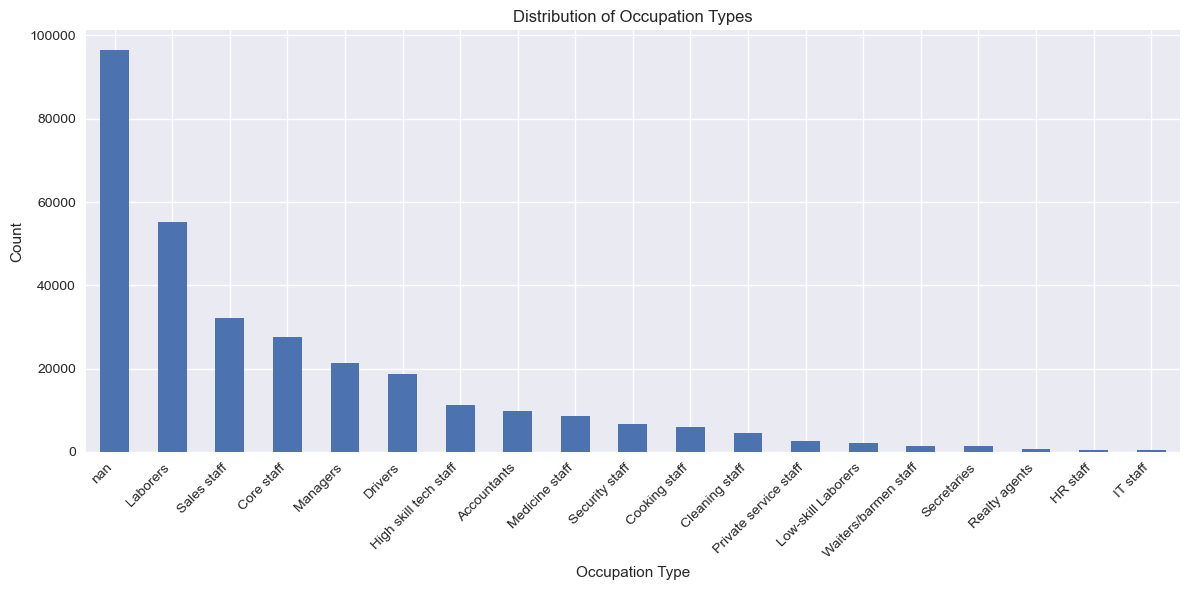

In [20]:
# Get value counts of OCCUPATION_TYPE and sort them in descending order
occupation_counts = cleaned_application_data['OCCUPATION_TYPE'].value_counts(dropna=False)
occupation_percentages = cleaned_application_data['OCCUPATION_TYPE'].value_counts(dropna=False, normalize=True) * 100

# Create a detailed summary
print("OCCUPATION_TYPE Distribution before imputation:")
print("-" * 50)
for occupation, count in occupation_counts.items():
    percentage = occupation_percentages[occupation]
    print(f"{occupation if occupation == occupation else 'Missing':<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Calculate total number of categories and missing values
total_categories = occupation_counts.size - (1 if occupation_counts.index.isna().any() else 0)
missing_count = occupation_counts.get(np.nan, 0)
missing_percentage = (missing_count / len(cleaned_application_data)) * 100

print("\nSummary Statistics:")
print("-" * 50)
print(f"Total number of categories: {total_categories}")
print(f"Total number of entries: {len(cleaned_application_data)}")
print(f"Missing values: {missing_count} ({missing_percentage:.2f}%)")

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
occupation_counts.plot(kind='bar')
plt.title('Distribution of Occupation Types')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Imputation of Missing Values in `OCCUPATION_TYPE`
- **Objective:** Address missing values in the `OCCUPATION_TYPE` column by imputing the mode ('Laborers') and ensuring consistency across the dataset.
- **Steps:**
  - Count missing values before imputation.
  - Impute missing entries in `OCCUPATION_TYPE` with 'Laborers', the most common occupation.
  - Recalculate and display distribution of values after imputation.
- **Expected Outcome:** Eliminate missing values in `OCCUPATION_TYPE`, resulting in a complete dataset for this feature.

Missing values before imputation: 96391

Missing values after imputation: 0

Distribution after imputation:
Laborers             | Count: 151577 | Percentage:  49.29%
Sales staff          | Count:  32102 | Percentage:  10.44%
Core staff           | Count:  27570 | Percentage:   8.97%
Managers             | Count:  21371 | Percentage:   6.95%
Drivers              | Count:  18603 | Percentage:   6.05%
High skill tech staff | Count:  11380 | Percentage:   3.70%
Accountants          | Count:   9813 | Percentage:   3.19%
Medicine staff       | Count:   8537 | Percentage:   2.78%
Security staff       | Count:   6721 | Percentage:   2.19%
Cooking staff        | Count:   5946 | Percentage:   1.93%
Cleaning staff       | Count:   4653 | Percentage:   1.51%
Private service staff | Count:   2652 | Percentage:   0.86%
Low-skill Laborers   | Count:   2093 | Percentage:   0.68%
Waiters/barmen staff | Count:   1348 | Percentage:   0.44%
Secretaries          | Count:   1305 | Percentage:   0.42%
Realt

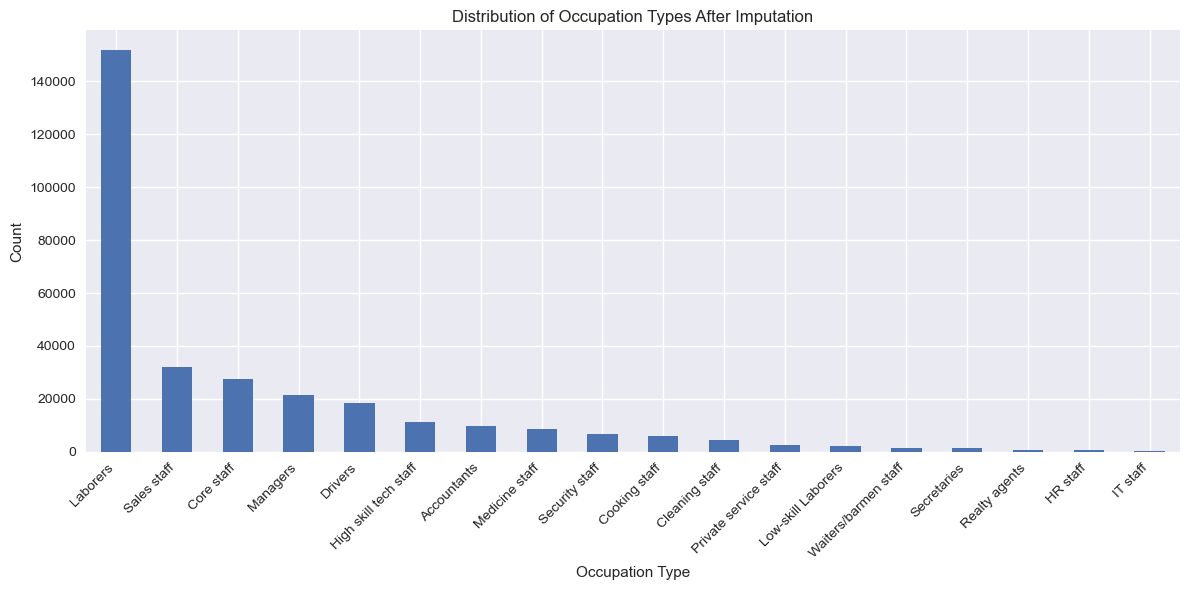

In [21]:
# Check the number of missing values before imputation
missing_before = cleaned_application_data['OCCUPATION_TYPE'].isnull().sum()
print("Missing values before imputation:", missing_before)

# Impute missing values with 'Laborers'
cleaned_application_data['OCCUPATION_TYPE'] = cleaned_application_data['OCCUPATION_TYPE'].fillna('Laborers')

# Verify that there are no more missing values
missing_after = cleaned_application_data['OCCUPATION_TYPE'].isnull().sum()
print("\nMissing values after imputation:", missing_after)

# Display new distribution
print("\nDistribution after imputation:")
occupation_counts = cleaned_application_data['OCCUPATION_TYPE'].value_counts()
occupation_percentages = cleaned_application_data['OCCUPATION_TYPE'].value_counts(normalize=True) * 100

for occupation, count in occupation_counts.items():
    percentage = occupation_percentages[occupation]
    print(f"{occupation:<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Create a bar plot of the new distribution
plt.figure(figsize=(12, 6))
cleaned_application_data['OCCUPATION_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Occupation Types After Imputation')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Imputation of Missing Values in `NAME_TYPE_SUITE`
- **Objective:** Replace missing values in `NAME_TYPE_SUITE` using the mode, to ensure completeness and maintain data consistency.
- **Steps:**
  - Calculate the distribution of `NAME_TYPE_SUITE` before imputation and identify the most common category (mode).
  - Impute missing values with the identified mode.
  - Reevaluate and visualize the distribution post-imputation to confirm the expected consistency.
- **Expected Outcome:** All missing values in `NAME_TYPE_SUITE` are replaced by the mode, reflecting the distribution observed prior to imputation.

Initial Distribution of NAME_TYPE_SUITE:
--------------------------------------------------
Unaccompanied        | Count: 248526 | Percentage:  80.82%
Family               | Count:  40149 | Percentage:  13.06%
Spouse, partner      | Count:  11370 | Percentage:   3.70%
Children             | Count:   3267 | Percentage:   1.06%
Other_B              | Count:   1770 | Percentage:   0.58%
Missing              | Count:   1292 | Percentage:   0.42%
Other_A              | Count:    866 | Percentage:   0.28%
Group of people      | Count:    271 | Percentage:   0.09%

Most common suite type (mode): Unaccompanied

Missing values before imputation: 1292
Missing values after imputation: 0

Distribution after imputation:
--------------------------------------------------
Unaccompanied        | Count: 249818 | Percentage:  81.24%
Family               | Count:  40149 | Percentage:  13.06%
Spouse, partner      | Count:  11370 | Percentage:   3.70%
Children             | Count:   3267 | Percentage:   1.

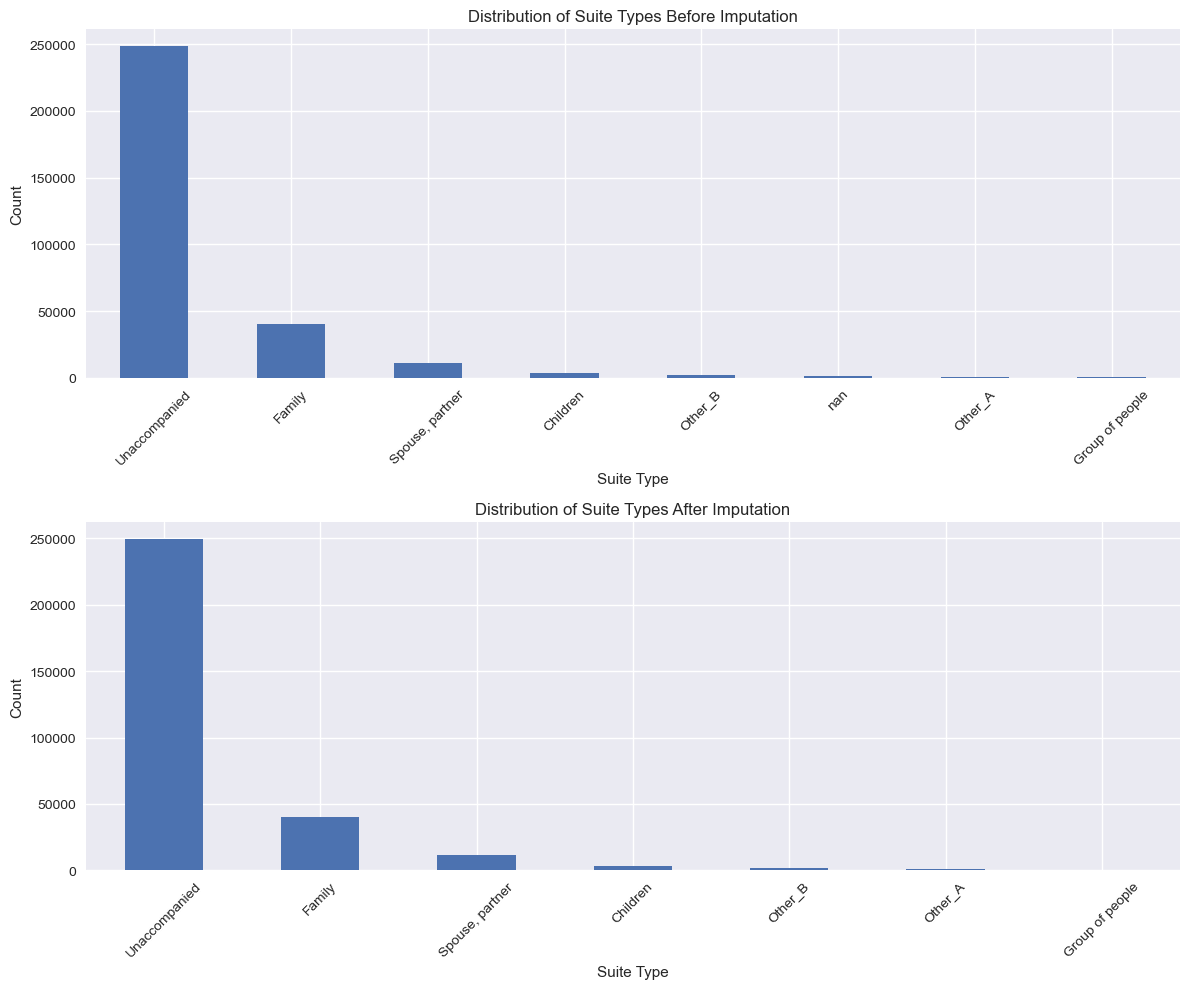


Summary:
--------------------------------------------------
Total number of categories: 7
Total number of entries: 307511
Number of values imputed: 1292
Most common category after imputation: Unaccompanied (249818 entries)


In [22]:
# Analyze the current distribution of NAME_TYPE_SUITE
print("Initial Distribution of NAME_TYPE_SUITE:")
print("-" * 50)
suite_counts = cleaned_application_data['NAME_TYPE_SUITE'].value_counts(dropna=False)
suite_percentages = cleaned_application_data['NAME_TYPE_SUITE'].value_counts(dropna=False, normalize=True) * 100

# Display current distribution with counts and percentages
for suite_type, count in suite_counts.items():
    percentage = suite_percentages[suite_type]
    print(f"{suite_type if suite_type == suite_type else 'Missing':<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Get the mode (most common value)
mode_suite = cleaned_application_data['NAME_TYPE_SUITE'].mode()[0]
print(f"\nMost common suite type (mode): {mode_suite}")

# Count missing values before imputation
missing_before = cleaned_application_data['NAME_TYPE_SUITE'].isnull().sum()
print(f"\nMissing values before imputation: {missing_before}")

# Impute missing values with the mode
cleaned_application_data['NAME_TYPE_SUITE'] = cleaned_application_data['NAME_TYPE_SUITE'].fillna(mode_suite)

# Verify imputation
missing_after = cleaned_application_data['NAME_TYPE_SUITE'].isnull().sum()
print(f"Missing values after imputation: {missing_after}")

# Display new distribution
print("\nDistribution after imputation:")
print("-" * 50)
new_suite_counts = cleaned_application_data['NAME_TYPE_SUITE'].value_counts()
new_suite_percentages = cleaned_application_data['NAME_TYPE_SUITE'].value_counts(normalize=True) * 100

for suite_type, count in new_suite_counts.items():
    percentage = new_suite_percentages[suite_type]
    print(f"{suite_type:<20} | Count: {count:>6} | Percentage: {percentage:>6.2f}%")

# Create before and after visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Before imputation plot
suite_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Suite Types Before Imputation')
ax1.set_xlabel('Suite Type')
ax1.set_ylabel('Count')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# After imputation plot
new_suite_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Suite Types After Imputation')
ax2.set_xlabel('Suite Type')
ax2.set_ylabel('Count')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary:")
print("-" * 50)
print(f"Total number of categories: {len(new_suite_counts)}")
print(f"Total number of entries: {len(cleaned_application_data)}")
print(f"Number of values imputed: {missing_before}")
print(f"Most common category after imputation: {new_suite_counts.index[0]} ({new_suite_counts.iloc[0]} entries)")

#### Imputation and Analysis of `AMT_ANNUITY`
- **Objective:** Address missing values in `AMT_ANNUITY` by imputing with the mean value to ensure continuity and complete analysis across the dataset.
- **Steps:**
  - **Initial Analysis:** Evaluate data type and calculate basic statistics, including missing values and percentage.
  - **Imputation Process:** Replace missing values with the mean amount to retain dataset consistency.
  - **Visualization:** Compare distribution histograms and box plots pre- and post-imputation to examine shifts in distribution and detect any significant impact of imputation.
- **Expected Outcome:** `AMT_ANNUITY` column has no missing values, preserving the original distribution while providing insight into average, median, and quartile values for further analysis.

AMT_ANNUITY Feature Analysis:
--------------------------------------------------
Data type: float64

Basic Statistics Before Imputation:
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Missing values before imputation: 12 (0.00%)

Mean value for imputation: 27108.57

Missing values after imputation: 0

Basic Statistics After Imputation:
count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


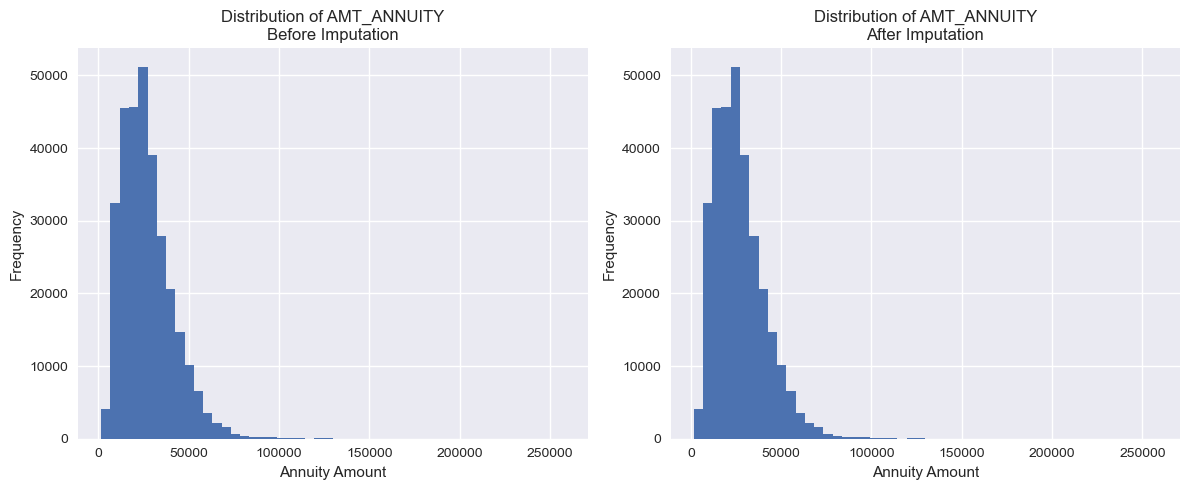


Distribution Analysis:
--------------------------------------------------
Minimum amount: 1615.50
Maximum amount: 258025.50
Average amount: 27108.57
Median amount: 24903.00

Quartile Information:
25th percentile: 16524.00
50th percentile (median): 24903.00
75th percentile: 34596.00


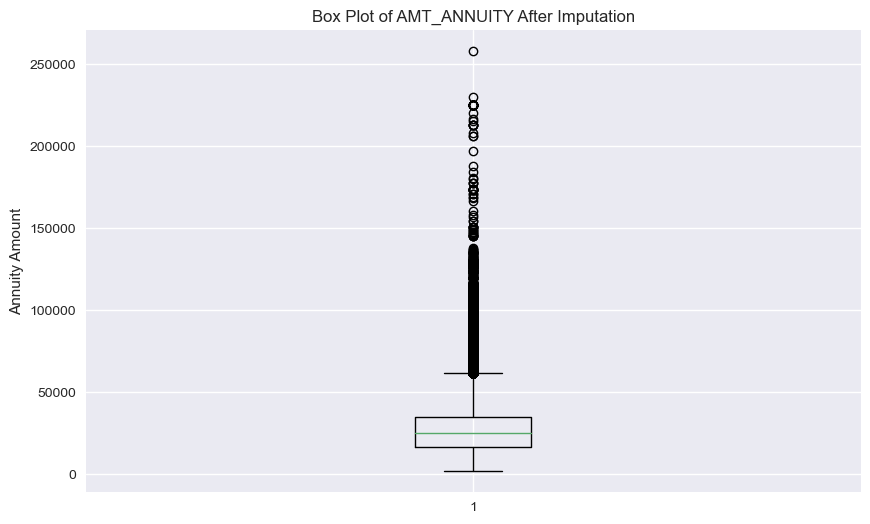

In [23]:
# Analyze the AMT_ANNUITY feature
print("AMT_ANNUITY Feature Analysis:")
print("-" * 50)

# Check data type
print("Data type:", cleaned_application_data['AMT_ANNUITY'].dtype)

# Basic statistics
print("\nBasic Statistics Before Imputation:")
print(cleaned_application_data['AMT_ANNUITY'].describe())

# Count missing values before imputation
missing_before = cleaned_application_data['AMT_ANNUITY'].isnull().sum()
missing_percentage = (missing_before / len(cleaned_application_data)) * 100
print(f"\nMissing values before imputation: {missing_before} ({missing_percentage:.2f}%)")

# Calculate mean for imputation
annuity_mean = cleaned_application_data['AMT_ANNUITY'].mean()
print(f"\nMean value for imputation: {annuity_mean:.2f}")

# Create visualization of distribution before imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cleaned_application_data['AMT_ANNUITY'].hist(bins=50)
plt.title('Distribution of AMT_ANNUITY\nBefore Imputation')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

# Impute missing values with mean
cleaned_application_data['AMT_ANNUITY'] = cleaned_application_data['AMT_ANNUITY'].fillna(annuity_mean)

# Verify imputation
missing_after = cleaned_application_data['AMT_ANNUITY'].isnull().sum()
print(f"\nMissing values after imputation: {missing_after}")

# Display statistics after imputation
print("\nBasic Statistics After Imputation:")
print(cleaned_application_data['AMT_ANNUITY'].describe())

# Create visualization of distribution after imputation
plt.subplot(1, 2, 2)
cleaned_application_data['AMT_ANNUITY'].hist(bins=50)
plt.title('Distribution of AMT_ANNUITY\nAfter Imputation')
plt.xlabel('Annuity Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional analysis
print("\nDistribution Analysis:")
print("-" * 50)
print(f"Minimum amount: {cleaned_application_data['AMT_ANNUITY'].min():.2f}")
print(f"Maximum amount: {cleaned_application_data['AMT_ANNUITY'].max():.2f}")
print(f"Average amount: {cleaned_application_data['AMT_ANNUITY'].mean():.2f}")
print(f"Median amount: {cleaned_application_data['AMT_ANNUITY'].median():.2f}")

# Calculate and display quartile information
quartiles = cleaned_application_data['AMT_ANNUITY'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Information:")
print(f"25th percentile: {quartiles[0.25]:.2f}")
print(f"50th percentile (median): {quartiles[0.5]:.2f}")
print(f"75th percentile: {quartiles[0.75]:.2f}")

# Box plot to show distribution and outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_application_data['AMT_ANNUITY'])
plt.title('Box Plot of AMT_ANNUITY After Imputation')
plt.ylabel('Annuity Amount')
plt.show()

#### Credit Bureau Request Features Imputation and Analysis
- **Objective:** Address missing values in credit bureau request columns, impute using median values, and convert data to whole numbers since these are scores and not required to be in decimal for consistency and interpretability.
- **Steps:**
  - **Initial Analysis:** For each feature (`AMT_REQ_CREDIT_BUREAU_QRT`, `HOUR`, `DAY`, `WEEK`, `MON`, `YEAR`), evaluate the missing values, data type, and calculate median values.
  - **Imputation Process:** Replace missing values with respective column medians to minimize skew, then round and convert data to integer format for ease of interpretation.
  - **Visualization:** Generate individual histograms to observe distributions post-imputation, and a heatmap to analyze correlations between features.
- **Expected Outcome:** Each credit bureau request column is complete, with distributions showcasing typical request frequency. Insights into common request counts and any notable correlations between request periods assist in understanding borrower behavior.

Credit Bureau Request Features Analysis:
----------------------------------------------------------------------

Analyzing QRT:
----------------------------------------
Data type: float64
Missing values: 41519 (13.50%)
Median value: 0.0

Before imputation:
count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

After imputation and conversion to whole numbers:
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Analyzing HOUR:
----------------------------------------
Data type: float64
Missing values: 41519 (13.50%)
Median value: 0.0

Before imputation:
count    265992.000000
mean          0.006402
std           0.083849
min          

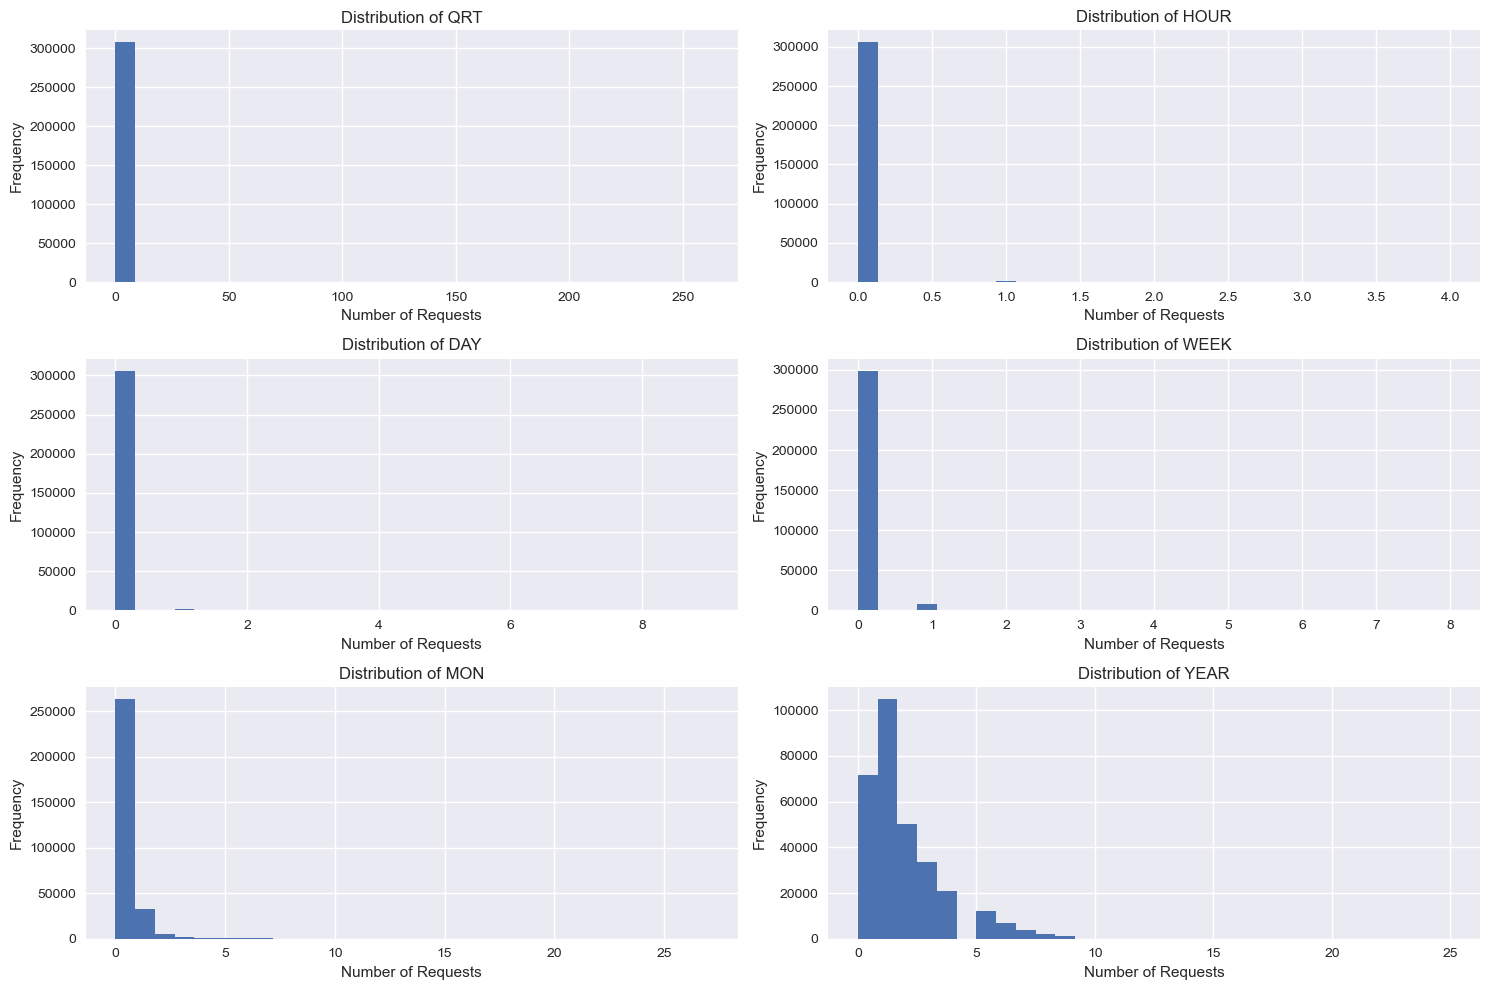

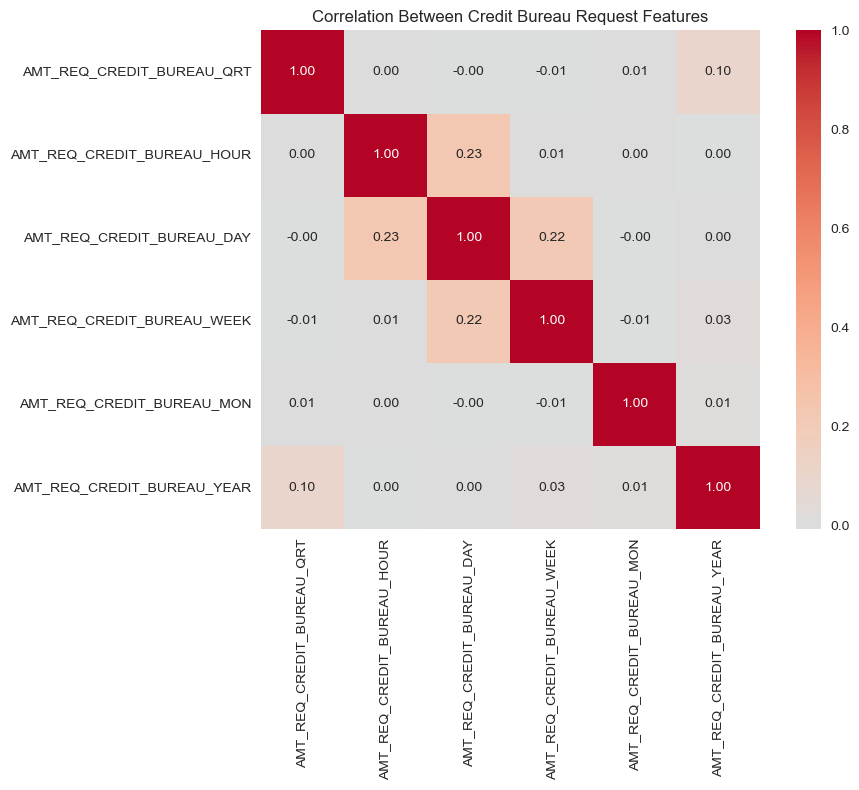


Final Summary Statistics:
----------------------------------------------------------------------

QRT:
Range: 0 to 261
Most common value: 0
Unique values: 11
Top 5 most common values:
AMT_REQ_CREDIT_BUREAU_QRT
0    256936
1     33862
2     14412
3      1717
4       476
Name: count, dtype: int64

HOUR:
Range: 0 to 4
Most common value: 0
Unique values: 5
Top 5 most common values:
AMT_REQ_CREDIT_BUREAU_HOUR
0    305885
1      1560
2        56
3         9
4         1
Name: count, dtype: int64

DAY:
Range: 0 to 9
Most common value: 0
Unique values: 9
Top 5 most common values:
AMT_REQ_CREDIT_BUREAU_DAY
0    306022
1      1292
2       106
3        45
4        26
Name: count, dtype: int64

WEEK:
Range: 0 to 8
Most common value: 0
Unique values: 9
Top 5 most common values:
AMT_REQ_CREDIT_BUREAU_WEEK
0    298975
1      8208
2       199
3        58
4        34
Name: count, dtype: int64

MON:
Range: 0 to 27
Most common value: 0
Unique values: 24
Top 5 most common values:
AMT_REQ_CREDIT_BUREAU_MON

In [24]:
# Define the credit bureau request columns
credit_bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Function to create a shortened display name
def get_short_name(col):
    return col.replace('AMT_REQ_CREDIT_BUREAU_', '')

# Initial analysis and imputation for each column
print("Credit Bureau Request Features Analysis:")
print("-" * 70)

for col in credit_bureau_cols:
    print(f"\nAnalyzing {get_short_name(col)}:")
    print("-" * 40)
    
    # Current data type and missing values
    missing_count = cleaned_application_data[col].isnull().sum()
    missing_percent = (missing_count / len(cleaned_application_data)) * 100
    print(f"Data type: {cleaned_application_data[col].dtype}")
    print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")
    
    # Calculate median for imputation
    median_value = cleaned_application_data[col].median()
    print(f"Median value: {median_value}")
    
    # Basic statistics before imputation
    print("\nBefore imputation:")
    print(cleaned_application_data[col].describe())
    
    # Impute missing values with median
    cleaned_application_data[col] = cleaned_application_data[col].fillna(median_value)
    
    # Convert to whole numbers
    cleaned_application_data[col] = cleaned_application_data[col].round().astype(int)
    
    # Statistics after imputation and rounding
    print("\nAfter imputation and conversion to whole numbers:")
    print(cleaned_application_data[col].describe())

# Visualize distributions after imputation
plt.figure(figsize=(15, 10))
for idx, col in enumerate(credit_bureau_cols, 1):
    plt.subplot(3, 2, idx)
    cleaned_application_data[col].hist(bins=30)
    plt.title(f'Distribution of {get_short_name(col)}')
    plt.xlabel('Number of Requests')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create correlation matrix
correlation_matrix = cleaned_application_data[credit_bureau_cols].corr()

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Between Credit Bureau Request Features')
plt.tight_layout()
plt.show()

# Summary statistics for all features
print("\nFinal Summary Statistics:")
print("-" * 70)
for col in credit_bureau_cols:
    print(f"\n{get_short_name(col)}:")
    print(f"Range: {cleaned_application_data[col].min()} to {cleaned_application_data[col].max()}")
    print(f"Most common value: {cleaned_application_data[col].mode()[0]}")
    print(f"Unique values: {cleaned_application_data[col].nunique()}")
    
    # Value counts for top 5 most common values
    print("Top 5 most common values:")
    print(cleaned_application_data[col].value_counts().head())

#### AMT_GOODS_PRICE Feature Imputation and Analysis
- **Objective:** Analyze, impute, and visualize the `AMT_GOODS_PRICE` feature to ensure data completeness and detect potential outliers.
- **Steps:**
  - **Initial Analysis:** Assess current statistics (min, max, median, mean) and missing values.
  - **Imputation Strategy:** Impute missing values using the median to preserve data distribution and avoid skew.
  - **Visualization:** 
    - Histograms are used to display distributions before and after imputation.
    - A box plot provides insights into potential outliers.
  - **Outlier Detection:** Compute Interquartile Range (IQR) and identify data points that fall outside this range as potential outliers.
  - **Value Range Distribution:** Segment the data into distinct ranges (Very Low, Low, Medium, High, Very High) and analyze distribution within each.

- **Expected Outcome:** `AMT_GOODS_PRICE` feature is complete, with potential outliers identified and range distributions analyzed, providing a clearer understanding of the loan amounts requested.

AMT_GOODS_PRICE Feature Analysis:
--------------------------------------------------
Data type: float64

Basic Statistics Before Imputation:
min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

Mean Value of this Feature:
538316.2943667056

Missing values before imputation: 0 (0.00%)

Median value for imputation: 450,000.00

Missing values after imputation: 0

Basic Statistics After Imputation:
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


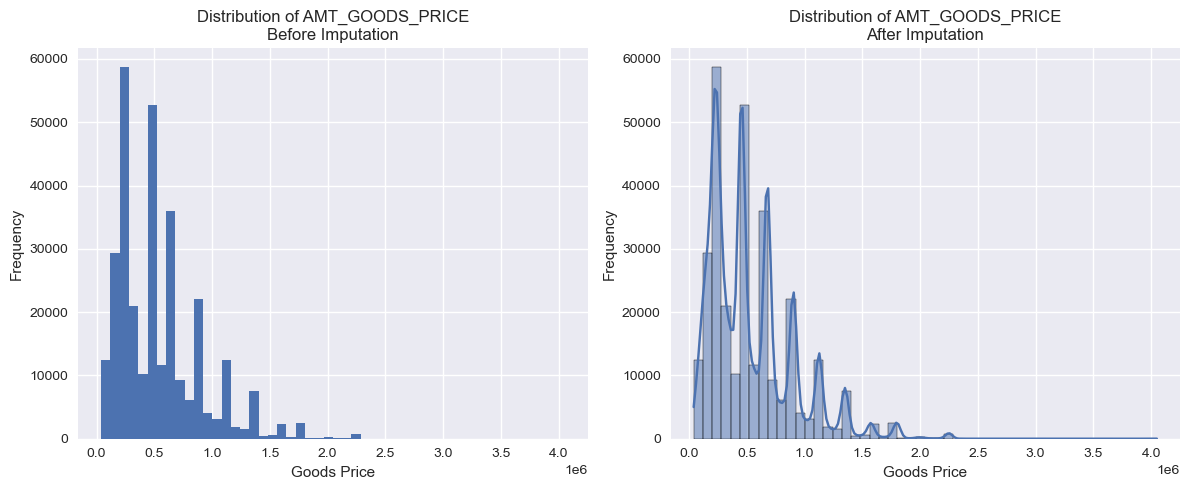


Detailed Distribution Analysis:
--------------------------------------------------
Minimum price: 40,500.00
Maximum price: 4,050,000.00
Average price: 538,316.29
Median price: 450,000.00

Quartile Information:
25th percentile: 238,500.00
50th percentile (median): 450,000.00
75th percentile: 679,500.00

Outlier Analysis:
Number of potential outliers: 14728
Percentage of outliers: 4.79%


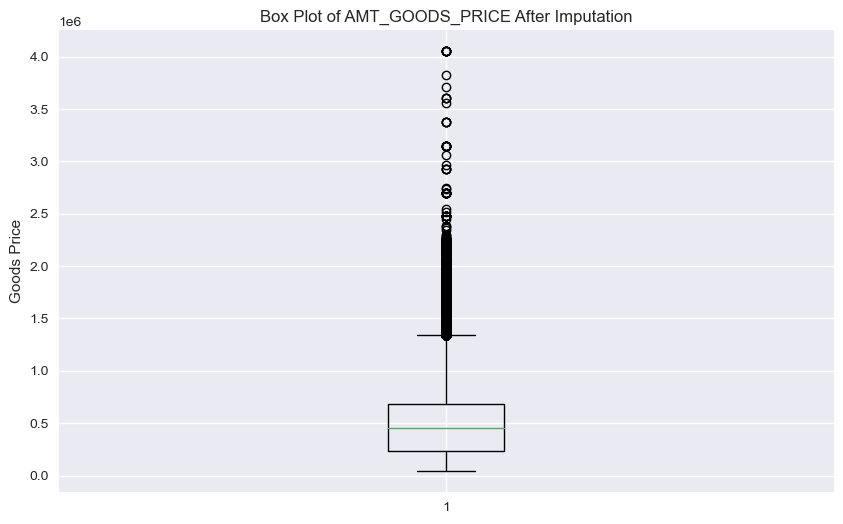


Value Range Distribution:
AMT_GOODS_PRICE
Very Low     247251
Low           56087
Medium         4108
High             47
Very High        18
Name: count, dtype: int64

First Few Rows of the Dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,Business Entity Type 3,1134.0,0,0,0,0,0,1
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,School,828.0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,Government,815.0,0,0,0,0,0,0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,Business Entity Type 3,617.0,0,0,0,0,0,1
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,1,1,Religion,1106.0,0,0,0,0,0,0


In [33]:
# Analyze AMT_GOODS_PRICE feature
print("AMT_GOODS_PRICE Feature Analysis:")
print("-" * 50)

# Check data type and basic info
print("Data type:", cleaned_application_data['AMT_GOODS_PRICE'].dtype)

# Initial statistics
print("\nBasic Statistics Before Imputation:")
print(cleaned_application_data['AMT_GOODS_PRICE'].agg(['min', 'max', 'median']))
print("\nMean Value of this Feature:")
print(cleaned_application_data['AMT_GOODS_PRICE'].mean())

# Count missing values before imputation
missing_before = cleaned_application_data['AMT_GOODS_PRICE'].isnull().sum()
missing_percentage = (missing_before / len(cleaned_application_data)) * 100
print(f"\nMissing values before imputation: {missing_before} ({missing_percentage:.2f}%)")

# Calculate median for imputation
goods_price_median = cleaned_application_data['AMT_GOODS_PRICE'].median()
print(f"\nMedian value for imputation: {goods_price_median:,.2f}")

# Create visualization of distribution before imputation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cleaned_application_data['AMT_GOODS_PRICE'].hist(bins=50)
plt.title('Distribution of AMT_GOODS_PRICE\nBefore Imputation')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')

# Impute missing values with median
cleaned_application_data['AMT_GOODS_PRICE'] = cleaned_application_data['AMT_GOODS_PRICE'].fillna(goods_price_median)

# Verify imputation
missing_after = cleaned_application_data['AMT_GOODS_PRICE'].isnull().sum()
print(f"\nMissing values after imputation: {missing_after}")

# Display statistics after imputation
print("\nBasic Statistics After Imputation:")
print(cleaned_application_data['AMT_GOODS_PRICE'].describe())

# After imputation - Histogram with KDE
plt.subplot(1, 2, 2)
sns.histplot(data=cleaned_application_data['AMT_GOODS_PRICE'], bins=50, kde=True)
plt.title('Distribution of AMT_GOODS_PRICE\nAfter Imputation')
plt.xlabel('Goods Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional analysis
print("\nDetailed Distribution Analysis:")
print("-" * 50)
print(f"Minimum price: {cleaned_application_data['AMT_GOODS_PRICE'].min():,.2f}")
print(f"Maximum price: {cleaned_application_data['AMT_GOODS_PRICE'].max():,.2f}")
print(f"Average price: {cleaned_application_data['AMT_GOODS_PRICE'].mean():,.2f}")
print(f"Median price: {cleaned_application_data['AMT_GOODS_PRICE'].median():,.2f}")

# Calculate and display quartile information
quartiles = cleaned_application_data['AMT_GOODS_PRICE'].quantile([0.25, 0.5, 0.75])
print("\nQuartile Information:")
print(f"25th percentile: {quartiles[0.25]:,.2f}")
print(f"50th percentile (median): {quartiles[0.5]:,.2f}")
print(f"75th percentile: {quartiles[0.75]:,.2f}")

# Calculate IQR and identify potential outliers
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = cleaned_application_data[
    (cleaned_application_data['AMT_GOODS_PRICE'] < lower_bound) | 
    (cleaned_application_data['AMT_GOODS_PRICE'] > upper_bound)
]

print(f"\nOutlier Analysis:")
print(f"Number of potential outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(cleaned_application_data) * 100):.2f}%")

# Box plot to show distribution and outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_application_data['AMT_GOODS_PRICE'])
plt.title('Box Plot of AMT_GOODS_PRICE After Imputation')
plt.ylabel('Goods Price')
plt.show()

# Distribution of values in different ranges
print("\nValue Range Distribution:")
value_ranges = pd.cut(cleaned_application_data['AMT_GOODS_PRICE'], 
                     bins=5, 
                     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
range_distribution = value_ranges.value_counts().sort_index()
print(range_distribution)

print("\nFirst Few Rows of the Dataset:")
cleaned_application_data.head()

### 3. Value Modification

#### Conversion of `DAYS` Columns to Positive Values
- **Objective:** Convert all `DAYS` columns from negative to positive values to improve readability and consistency.
- **Rationale:** `DAYS` columns (such as `DAYS_BIRTH`, `DAYS_EMPLOYED`) often represent days elapsed before a specific event (e.g., date of birth or employment). Converting these to positive values enhances interpretability.
- **Steps:**
  - Identify columns that start with `DAYS`.
  - Apply absolute value transformation to make values positive.
  
- **Expected Outcome:** All `DAYS` columns will now contain positive values, making them more intuitive for analysis.
- **Columns Processed:** Displays each column converted to confirm changes.

In [29]:
# Get all columns that start with 'DAYS'
days_columns = [col for col in cleaned_application_data.columns if col.startswith('DAYS')]

# Convert negative values to positive using absolute value
for col in days_columns:
    cleaned_application_data[col] = cleaned_application_data[col].abs()

# Print the list of columns that were processed
print("Columns converted to positive values:")
for col in days_columns:
    print(col)

Columns converted to positive values:
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE


### 4. Outlier Detection and Binning

#### Binning and Distribution of `AMT_GOODS_PRICE`
- **Objective:** Segment `AMT_GOODS_PRICE` into defined price ranges to better understand loan distributions across different product values.
- **Approach:**
  - Define specific price ranges (e.g., `0-100k`, `100-200k`, ..., `Above 900k`).
  - Assign each `AMT_GOODS_PRICE` value to its respective range.
  
- **Insights Derived:**
  - Calculate distribution and percentage of applications across each price range.
  - Visualize distribution in a bar plot for an easy overview of application volume across price ranges.

- **Outcome:** Clear segmentation of `AMT_GOODS_PRICE` reveals common price bands and highlights any price-related trends in loan applications.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

Distribution of AMT_GOODS_PRICE ranges:
--------------------------------------------------
AMT_GOODS_PRICE_RANGE
0-100k         8709
100-200k      32956
200-300k      62761
300-400k      21219
400-500k      57251
500-600k      13117
600-700k      40024
700-800k       8110
800-900k      21484
Above 900k    41880
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_GOODS_PRICE_RANGE
0-100k         2.83%
100-200k      10.72%
200-300k      20.41%
300-400k        6.9%
400-500k      18.62%
500-600k       4.27%
600-700k      13.02%
700-800k       2.64%
800-900k       6.99%
Above 900k    13.62%
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\4287470575.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sizes = cleaned_application_data.groupby('AMT_GOODS_PRICE_RANGE').size()


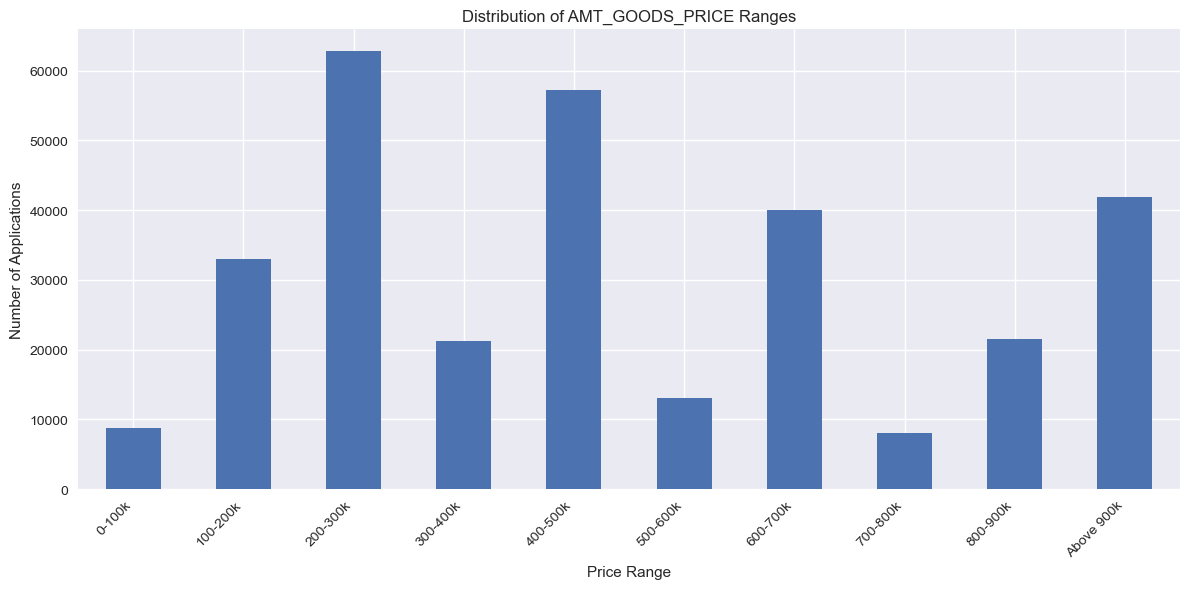

In [45]:
# Identify data distribution across different percentiles
AMT_GOODS_PRICE_QUANTILES = cleaned_application_data['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_GOODS_PRICE_QUANTILES)

# Create bins and labels for AMT_GOODS_PRICE
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 4050000]
ranges = ['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', 'Above 900k']

# Create new column with binned values
cleaned_application_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(cleaned_application_data['AMT_GOODS_PRICE'], 
                                                         bins=bins, 
                                                         labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_GOODS_PRICE_RANGE').size()
print("\nDistribution of AMT_GOODS_PRICE ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_GOODS_PRICE Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `AMT_INCOME_TOTAL`
- **Objective:** Segment `AMT_INCOME_TOTAL` into predefined income ranges to analyze applicant distribution across various income brackets.
- **Approach:**
  - Define income ranges (e.g., `0-100k`, `100-150k`, ..., `Above 450k`) based on quantile analysis to establish structured bins.
  - Assign each `AMT_INCOME_TOTAL` value to a corresponding income range.

- **Insights Derived:**
  - Calculate counts and percentage distributions within each income range.
  - Display these distributions in a bar plot to provide a visual summary of applicant income levels.

- **Outcome:** Segmented view of income distribution, highlighting predominant income brackets among applicants and identifying any notable trends related to income range.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

Distribution of AMT_INCOME_TOTAL ranges:
--------------------------------------------------
AMT_INCOME_TOTAL_RANGE
0-100k        63698
100-150k      91591
150-200k      64307
200-250k      48137
250-300k      17039
300-350k       8874
350-400k       5802
400-450        4924
Above 450k      125
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_INCOME_TOTAL_RANGE
0-100k        20.71%
100-150k      29.78%
150-200k      20.91%
200-250k      15.65%
250-300k       5.54%
300-350k       2.89%
350-400k       1.89%
400-450         1.6%
Above 450k     0.04%
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\626772508.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sizes = cleaned_application_data.groupby('AMT_INCOME_TOTAL_RANGE').size()


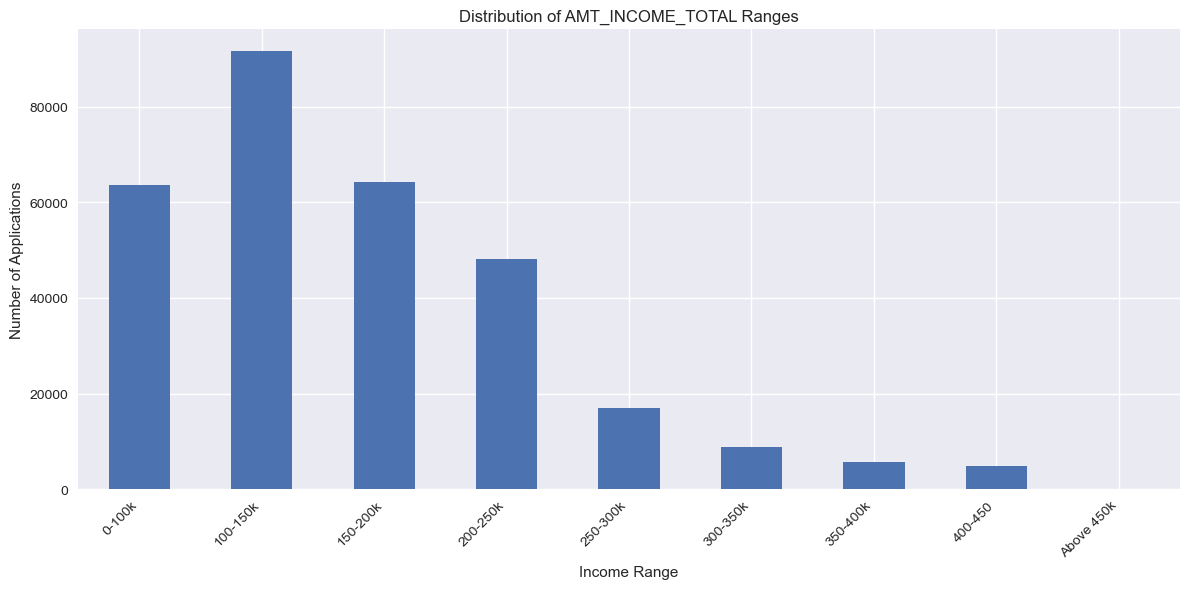

In [46]:
# Identify data distribution across different percentiles
AMT_INCOME_TOTAL_QUANTILES = cleaned_application_data['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_INCOME_TOTAL_QUANTILES)

# Create bins and labels for AMT_INCOME_TOTAL
bins = [0, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 472500]
ranges = ['0-100k', '100-150k', '150-200k', '200-250k', '250-300k', '300-350k', '350-400k', '400-450', 'Above 450k']

# Create new column with binned values
cleaned_application_data['AMT_INCOME_TOTAL_RANGE'] = pd.cut(cleaned_application_data['AMT_INCOME_TOTAL'], 
                                                          bins=bins, 
                                                          labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_INCOME_TOTAL_RANGE').size()
print("\nDistribution of AMT_INCOME_TOTAL ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_INCOME_TOTAL Ranges')
plt.xlabel('Income Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `AMT_CREDIT`
- **Objective:** Segment `AMT_CREDIT` into specific credit ranges to examine the distribution of loan amounts requested by applicants.
- **Approach:**
  - Defined credit ranges (e.g., `0-200k`, `200-400k`, ..., `Above 1M`) informed by quantile analysis for meaningful segmentation.
  - Categorized each `AMT_CREDIT` value into these predefined ranges.

- **Insights Derived:**
  - Calculated count and percentage of applications for each credit range.
  - Visualized this distribution in a bar plot, allowing for an accessible overview of loan amount frequency across ranges.

- **Outcome:** The binned `AMT_CREDIT` data offers insights into commonly requested loan amounts, facilitating better understanding of credit preferences among applicants.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

Distribution of AMT_CREDIT ranges:
--------------------------------------------------
AMT_CREDIT_RANGE
0-200k      36144
200-400k    81151
400-600k    66270
600-800k    43242
800-900k    21792
900-1M       8927
Above 1M    46910
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_CREDIT_RANGE
0-200k      11.75%
200-400k    26.39%
400-600k    21.55%
600-800k    14.06%
800-900k     7.09%
900-1M        2.9%
Above 1M    15.25%
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\2710622518.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sizes = cleaned_application_data.groupby('AMT_CREDIT_RANGE').size()


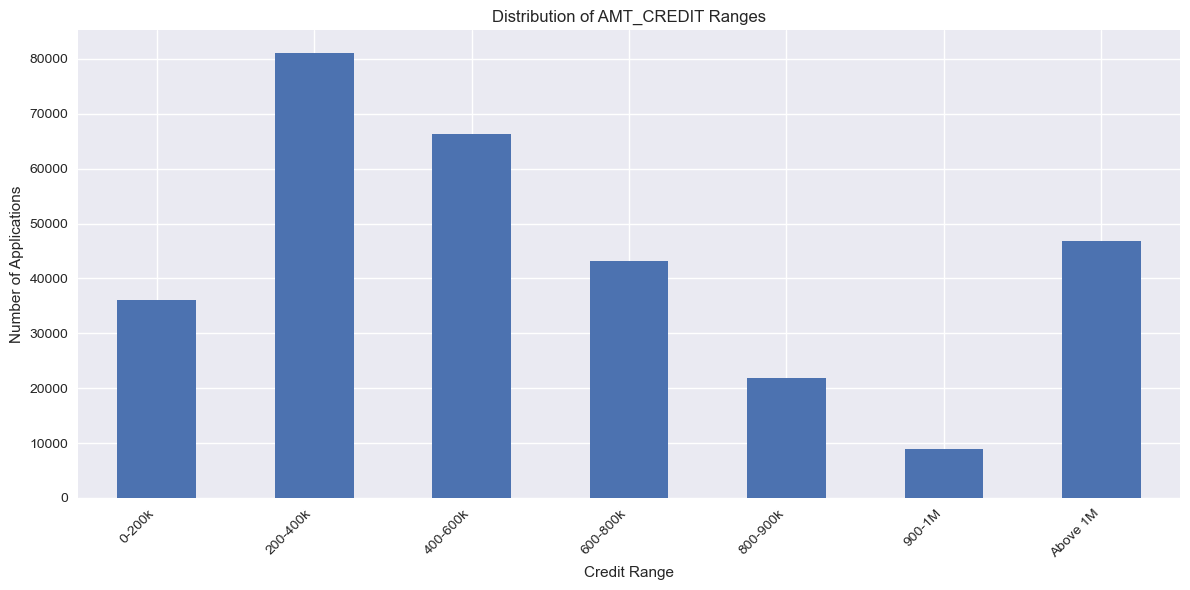

In [48]:
# Identify data distribution across different percentiles for AMT_CREDIT
AMT_CREDIT_QUANTILES = cleaned_application_data['AMT_CREDIT'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_CREDIT_QUANTILES)

# Create bins and labels for AMT_CREDIT
bins = [0, 200000, 400000, 600000, 800000, 900000, 1000000, 1854000]
ranges = ['0-200k', '200-400k', '400-600k', '600-800k', '800-900k', '900-1M', 'Above 1M']

# Create new column with binned values
cleaned_application_data['AMT_CREDIT_RANGE'] = pd.cut(cleaned_application_data['AMT_CREDIT'], 
                                                    bins=bins, 
                                                    labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_CREDIT_RANGE').size()
print("\nDistribution of AMT_CREDIT ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_CREDIT Ranges')
plt.xlabel('Credit Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `AMT_ANNUITY`
- **Objective:** Categorize `AMT_ANNUITY` values into defined annuity ranges to better understand the distribution of loan annuities among applicants.
- **Approach:**
  - Establish annuity ranges (e.g., `0-25k`, `25k-50k`, ..., `Above 200k`) based on percentile analysis for granular segmentation.
  - Assign each `AMT_ANNUITY` value to a corresponding range.

- **Insights Derived:**
  - Calculate the count and percentage of applications in each annuity range.
  - Visualize the distribution with a bar plot to highlight frequency across various annuity amounts.

- **Outcome:** The segmentation of `AMT_ANNUITY` unveils common annuity values, assisting in identifying typical loan repayment terms preferred by applicants.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

Distribution of AMT_ANNUITY ranges:
--------------------------------------------------
AMT_ANNUITY_RANGE
0-25k         154867
25k-50k       131347
50k-100k       20792
100k-150k        437
150k-200k         32
Above 200k        35
dtype: int64

Percentage distribution:
--------------------------------------------------
AMT_ANNUITY_RANGE
0-25k         50.36%
25k-50k       42.71%
50k-100k       6.76%
100k-150k      0.14%
150k-200k      0.01%
Above 200k     0.01%
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\2419040005.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sizes = cleaned_application_data.groupby('AMT_ANNUITY_RANGE').size()


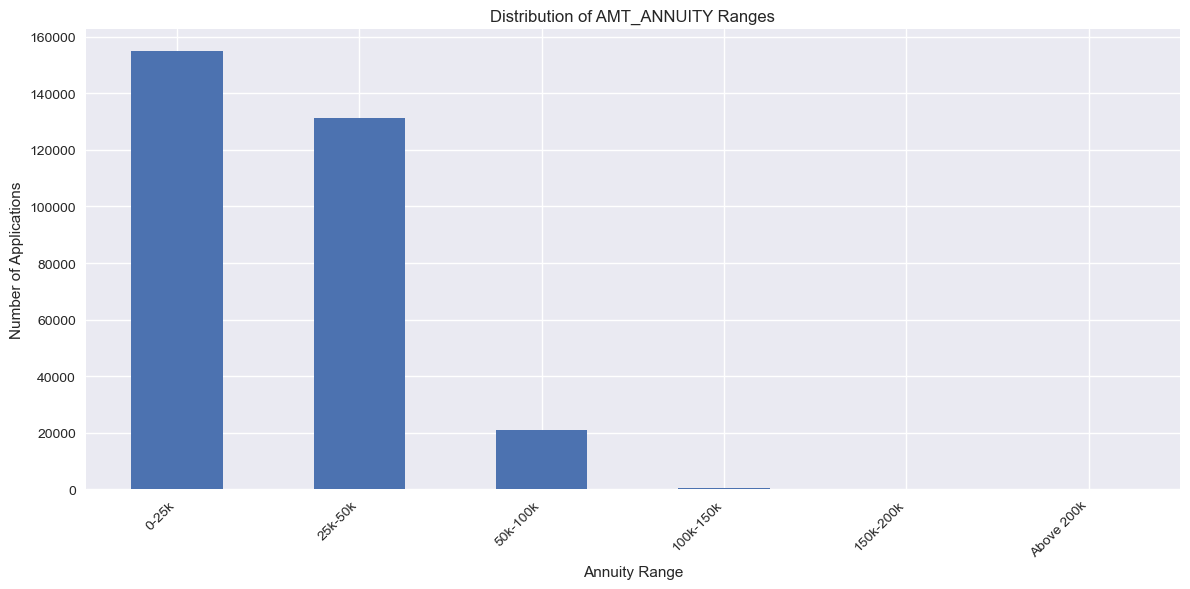

In [49]:
# Identify data distribution across different percentiles for AMT_ANNUITY
AMT_ANNUITY_QUANTILES = cleaned_application_data['AMT_ANNUITY'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(AMT_ANNUITY_QUANTILES)

# Create bins and labels for AMT_ANNUITY
bins = [0,25000,50000,100000,150000,200000,258025]
ranges = ['0-25k', '25k-50k', '50k-100k', '100k-150k', '150k-200k', 'Above 200k']

# Create new column with binned values
cleaned_application_data['AMT_ANNUITY_RANGE'] = pd.cut(cleaned_application_data['AMT_ANNUITY'], 
                                                      bins=bins, 
                                                      labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('AMT_ANNUITY_RANGE').size()
print("\nDistribution of AMT_ANNUITY ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of AMT_ANNUITY Ranges')
plt.xlabel('Annuity Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `DAYS_EMPLOYED`
- **Objective:** Segment `DAYS_EMPLOYED` to understand employment duration trends among applicants and analyze possible correlations with loan behavior.
- **Approach:**
  - Establish employment duration ranges (e.g., `0-5Y`, `5Y-10Y`, ..., `Above 50Y`) to group applicants by employment history.
  - Categorize each applicant’s `DAYS_EMPLOYED` value within the relevant range.

- **Insights Derived:**
  - Compute the count and percentage of applications across each employment duration range.
  - Present the distribution in a bar plot, highlighting patterns in applicant employment tenure.

- **Outcome:** The segmentation provides a clearer view of applicant employment stability, which can be insightful for assessing financial reliability and potential loan repayment capabilities.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

Distribution of DAYS_EMPLOYED ranges:
--------------------------------------------------
DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27549
15Y-20Y       10849
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
Above 50Y     55374
dtype: int64

Percentage distribution:
--------------------------------------------------
DAYS_EMPLOYED_RANGE
0-5Y         44.33%
5Y-10Y        21.1%
10Y-15Y       8.96%
15Y-20Y       3.53%
20Y-25Y       2.03%
25Y-30Y       1.08%
30Y-35Y       0.63%
35Y-40Y       0.27%
40Y-45Y       0.07%
45Y-50Y       0.01%
Above 50Y    18.01%
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\694629284.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sizes = cleaned_application_data.groupby('DAYS_EMPLOYED_RANGE').size()


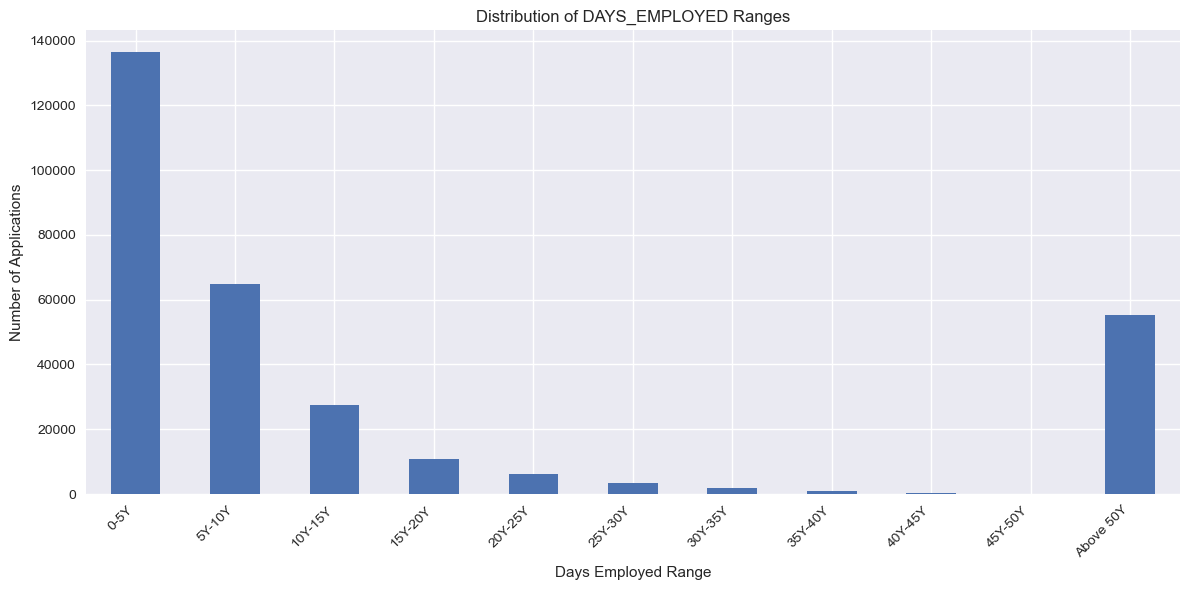

In [51]:
# Identify data distribution across different percentiles for DAYS_EMPLOYED
DAYS_EMPLOYED_QUANTILES = cleaned_application_data['DAYS_EMPLOYED'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(DAYS_EMPLOYED_QUANTILES)

# Create bins and labels for DAYS_EMPLOYED
bins = [0, 1825,3650,5475,7300,9125,10950,12775,14600,16425,18250,365243]
ranges = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y', 'Above 50Y'] 

# Create new column with binned values
cleaned_application_data['DAYS_EMPLOYED_RANGE'] = pd.cut(cleaned_application_data['DAYS_EMPLOYED'], 
                                                       bins=bins, 
                                                       labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('DAYS_EMPLOYED_RANGE').size()
print("\nDistribution of DAYS_EMPLOYED ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of DAYS_EMPLOYED Ranges')
plt.xlabel('Days Employed Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Binning and Distribution of `DAYS_BIRTH`
- **Objective:** Segment `DAYS_BIRTH` into defined age ranges to analyze age distribution among applicants and observe trends across different age groups.
- **Approach:**
  - Creat specific age ranges (e.g., `20Y-30Y`, `30Y-40Y`, ..., `Above 60Y`) based on `DAYS_BIRTH` values.
  - Assign each applicant’s `DAYS_BIRTH` to the appropriate age range.

- **Insights Derived:**
  - Calculate the distribution and percentage of applicants within each age range.
  - Visualize the age distribution in a bar plot to provide an overview of application volume across age groups.

- **Outcome:** Segmentation of `DAYS_BIRTH` highlights prevalent age ranges, offering insights into the age demographics of applicants, which may inform strategies tailored to different age segments.

Data Distribution Across Different Percentiles:
--------------------------------------------------
0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

Distribution of DAYS_BIRTH ranges:
--------------------------------------------------
DAYS_BIRTH_RANGE
2OY              0
20Y-30Y      45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
Above 60Y    35579
dtype: int64

Percentage distribution:
--------------------------------------------------
DAYS_BIRTH_RANGE
2OY            0.0%
20Y-30Y      14.64%
30Y-40Y      26.77%
40Y-50Y      24.89%
50Y-60Y      22.13%
Above 60Y    11.57%
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_12528\1865078250.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_sizes = cleaned_application_data.groupby('DAYS_BIRTH_RANGE').size()


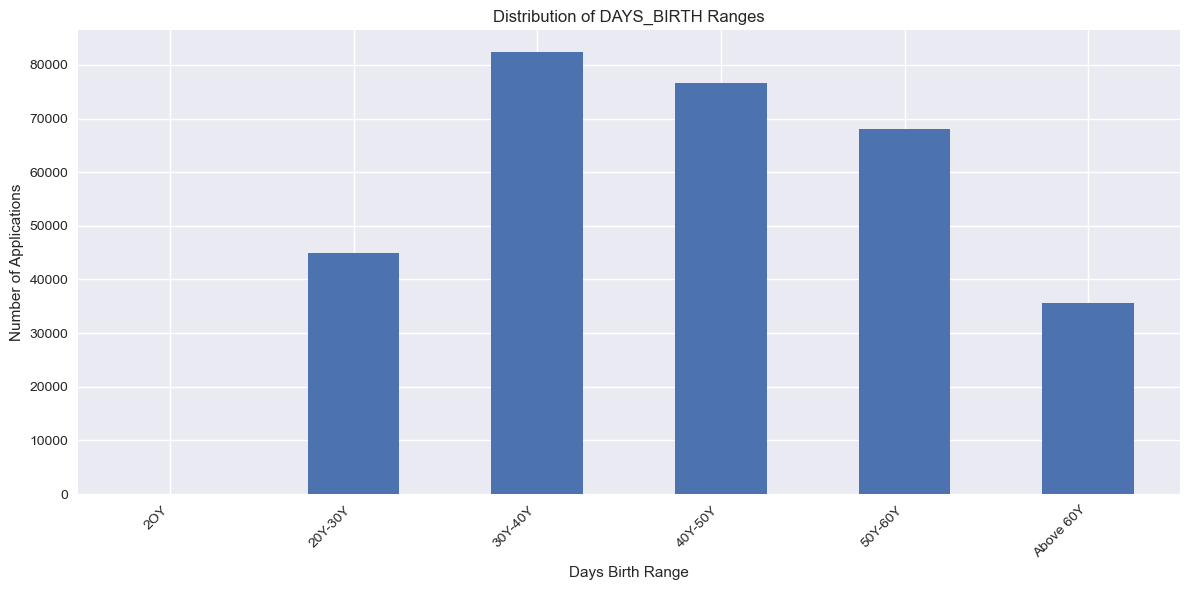


Summary Statistics for DAYS_BIRTH:
--------------------------------------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


In [52]:
# Identify data distribution across different percentiles for DAYS_BIRTH
DAYS_BIRTH_QUANTILES = cleaned_application_data['DAYS_BIRTH'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])
print("Data Distribution Across Different Percentiles:")
print("-" * 50)
print(DAYS_BIRTH_QUANTILES)

# Create bins and labels for DAYS_BIRTH
bins = [0,7300,10950,14600,18250,21900,25229]
ranges = ['2OY', '20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

# Create new column with binned values
cleaned_application_data['DAYS_BIRTH_RANGE'] = pd.cut(cleaned_application_data['DAYS_BIRTH'], 
                                                    bins=bins, 
                                                    labels=ranges)

# Display the size of each range
range_sizes = cleaned_application_data.groupby('DAYS_BIRTH_RANGE').size()
print("\nDistribution of DAYS_BIRTH ranges:")
print("-" * 50)
print(range_sizes)

# Calculate and display percentages
range_percentages = (range_sizes / len(cleaned_application_data) * 100).round(2)
print("\nPercentage distribution:")
print("-" * 50)
print(range_percentages.astype(str) + '%')

# Create a bar plot of the distribution
plt.figure(figsize=(12, 6))
range_sizes.plot(kind='bar')
plt.title('Distribution of DAYS_BIRTH Ranges')
plt.xlabel('Days Birth Range')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional statistics
print("\nSummary Statistics for DAYS_BIRTH:")
print("-" * 50)
print(cleaned_application_data['DAYS_BIRTH'].describe())

### 5. Data Analysis

In [61]:
# View info about the dataset
print("View the basic information of the dataset:")
print("-" * 50)
cleaned_application_data.info()

# View the head of the dataset
print("\nFirst 5 rows of object fetures:")
print("-" * 50)
cleaned_application_data.select_dtypes(include=['object']).head()

View the basic information of the dataset:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCA

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3
1,Cash loans,F,Family,State servant,Higher education,Married,House / apartment,Core staff,School
2,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government
3,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3
4,Cash loans,M,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion


In [63]:
# Display the object columns
print("\nList of object columns:")
print("-" * 50)
obj_variables = cleaned_application_data.select_dtypes(include=['object']).columns
obj_variables


List of object columns:
--------------------------------------------------


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

#### Analysis of `NAME_CONTRACT_TYPE` and Relationship with `TARGET`
- **Objective:** Understand the distribution of contract types and analyze their relationship with loan repayment status.
  
- **Steps:**
  - Retrieve unique values in `NAME_CONTRACT_TYPE` and counte occurrences of each contract type.
  - Calculate proportions for each contract type to understand its share in the dataset.
  - Analyze the relationship between `NAME_CONTRACT_TYPE` and `TARGET` (loan repayment status) through cross-tabulation.

- **Visualizations:**
  - **Pie Chart** for `NAME_CONTRACT_TYPE` distribution, highlighting the share of each contract type.
  - **Bar Plot** displaying loan repayment (TARGET) distribution by contract type to observe default patterns.
  - **Bar Plot** for default percentages across contract types, color-coded for clarity.

- **Statistical Insights:**
  - **Default Rates by Contract Type**: Calculate to show the likelihood of default for each contract type.
  - **Chi-Square Test of Independence**: Perform to assess the statistical association between `NAME_CONTRACT_TYPE` and `TARGET`.
    - Chi-square statistic and p-value obtained indicate whether the association is significant.

- **Outcome:** The analysis reveals key insights on default rates by contract type, which could be valuable in understanding the risk associated with different loan types and in making informed lending decisions.

Unique values in NAME_CONTRACT_TYPE:
--------------------------------------------------
['Cash loans' 'Revolving loans']

Count of each contract type:
--------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

Proportion of each contract type:
--------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         90.5
Revolving loans     9.5
Name: proportion, dtype: float64 %

Cross-tabulation of CONTRACT_TYPE and TARGET:
--------------------------------------------------
TARGET                  0     1
NAME_CONTRACT_TYPE             
Cash loans          91.65  8.35
Revolving loans     94.52  5.48


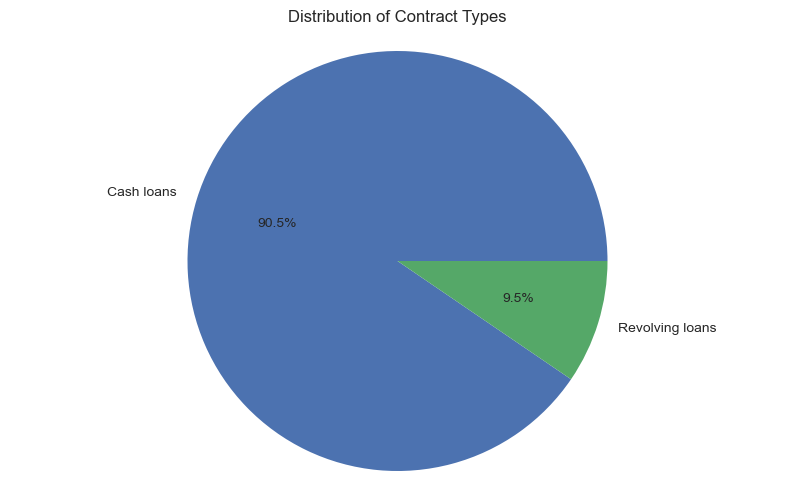

<Figure size 1000x600 with 0 Axes>

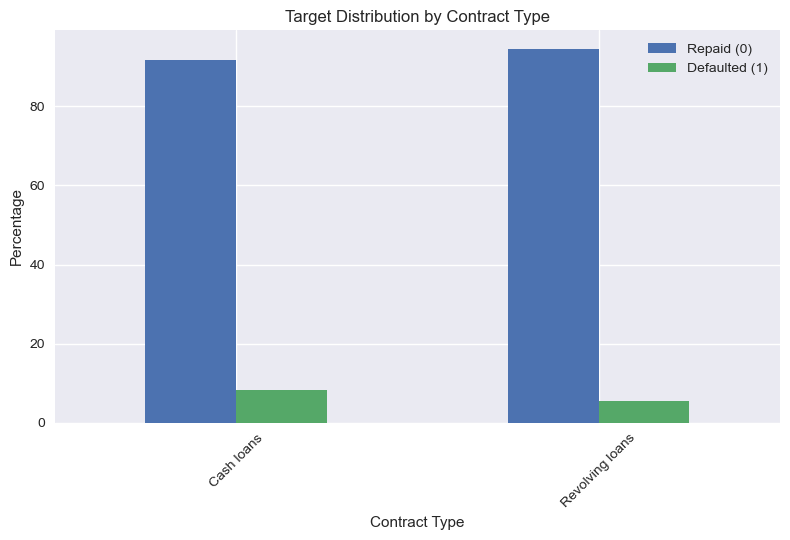

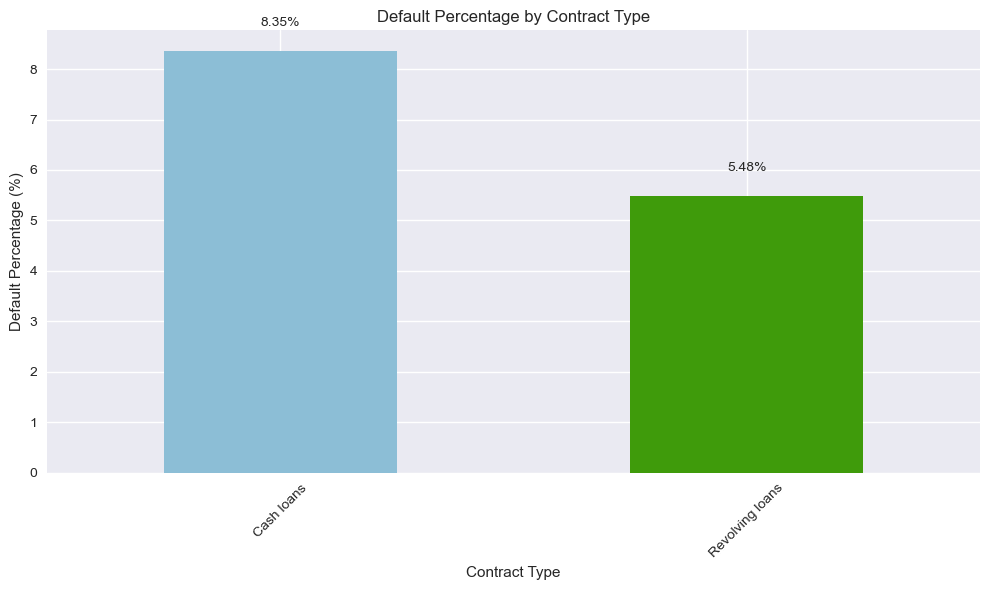


Default Rate by Contract Type:
--------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         8.35
Revolving loans    5.48
dtype: float64 %

Chi-square Test Results:
--------------------------------------------------
Chi-square statistic: 293.1505
p-value: 0.0000


In [75]:
# Look at unique values in NAME_CONTRACT_TYPE
print("Unique values in NAME_CONTRACT_TYPE:")
print("-" * 50)
print(cleaned_application_data['NAME_CONTRACT_TYPE'].unique())

# Get the size (count) of each unique value
contract_type_counts = cleaned_application_data['NAME_CONTRACT_TYPE'].value_counts()
print("\nCount of each contract type:")
print("-" * 50)
print(contract_type_counts)

# Calculate proportions
contract_type_proportions = cleaned_application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)
print("\nProportion of each contract type:")
print("-" * 50)
print(contract_type_proportions.round(3) * 100, '%')

# Analyze relationship with TARGET
print("\nCross-tabulation of CONTRACT_TYPE and TARGET:")
print("-" * 50)
crosstab = pd.crosstab(cleaned_application_data['NAME_CONTRACT_TYPE'], 
                       cleaned_application_data['TARGET'], 
                       normalize='index') * 100
print(crosstab.round(2))

# Create visualizations

# Pie chart for contract type distribution
plt.figure(figsize=(10, 6))
plt.pie(contract_type_counts, labels=contract_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Contract Types')
plt.axis('equal')
plt.show()

# Bar plot for TARGET distribution by contract type
plt.figure(figsize=(10, 6))
contract_type_target.plot(kind='bar')
plt.title('Target Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(['Repaid (0)', 'Defaulted (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for default percentages with different colors
default_percentages = (cleaned_application_data.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean() * 100).round(2)
plt.figure(figsize=(10, 6))
colors = ['#8cbed6', '#3f9b0b']
ax = default_percentages.plot(kind='bar', color=colors)
plt.title('Default Percentage by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Default Percentage (%)')
plt.xticks(rotation=45)
for i, v in enumerate(default_percentages):
    plt.text(i, v + 0.5, f'{v}%', ha='center')
plt.tight_layout()
plt.show()

# Calculate default rates by contract type
default_rates = pd.crosstab(cleaned_application_data['NAME_CONTRACT_TYPE'], 
                           cleaned_application_data['TARGET'])[1] / \
                pd.crosstab(cleaned_application_data['NAME_CONTRACT_TYPE'], 
                           cleaned_application_data['TARGET']).sum(axis=1) * 100

print("\nDefault Rate by Contract Type:")
print("-" * 50)
print(default_rates.round(2), '%')

# Chi-square test of independence
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(cleaned_application_data['NAME_CONTRACT_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Test Results:")
print("-" * 50)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

#### Analysis of `CODE_GENDER` Column
- **Objective:** Investigate the distribution of genders, analyze loan repayment behavior by gender, and examine financial metrics based on gender.

- **Steps:**
  - **Basic Distribution and Missing Values:**
    - Check unique values and calculate the count and percentage distribution for each gender.
    - Verify that there are no missing values in `CODE_GENDER`.
  - **Default Analysis by Gender:**
    - Analyze default rates (TARGET variable) for each gender and perform a Chi-square test to determine if default rates vary significantly by gender.
  - **Financial Metrics Analysis:**
    - Compare average, median, and standard deviation for key financial metrics (`AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `AMT_ANNUITY`) by gender.
  
- **Visualizations:**
  - **Pie Chart** showing the overall gender distribution.
  - **Bar Chart** displaying default rates by gender, with color-coded bars indicating the lowest and highest default rates.
  - **Box Plots** for each financial metric to observe the income, credit amount, and annuity amount distribution by gender.

- **Statistical Insights:**
  - **Default Rate by Gender:** Identify and visualize default rates for each gender.
  - **Chi-Square Test Result:** Perform to evaluate the statistical significance of gender differences in default rates.
  
- **Outcome:** The analysis highlights differences in default rates and financial characteristics by gender, providing insights into the role of gender in loan performance.

Analysis of CODE_GENDER Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['M' 'F' 'XNA']

Value counts:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Percentages:
CODE_GENDER
F      65.83%
M      34.16%
XNA      0.0%
Name: count, dtype: object

Missing values: 0

2. Default Analysis by Gender:
------------------------------

Default rates by gender (%):
TARGET            0      1
CODE_GENDER               
F             93.00   7.00
M             89.86  10.14
XNA          100.00   0.00

Chi-square test:
Chi-square statistic: 920.79
p-value: 0.0000000000

3. Financial Analysis by Gender:
------------------------------

Financial metrics by gender:
            AMT_INCOME_TOTAL                      AMT_CREDIT            \
                        mean    median        std       mean    median   
CODE_GENDER                                                              
F        

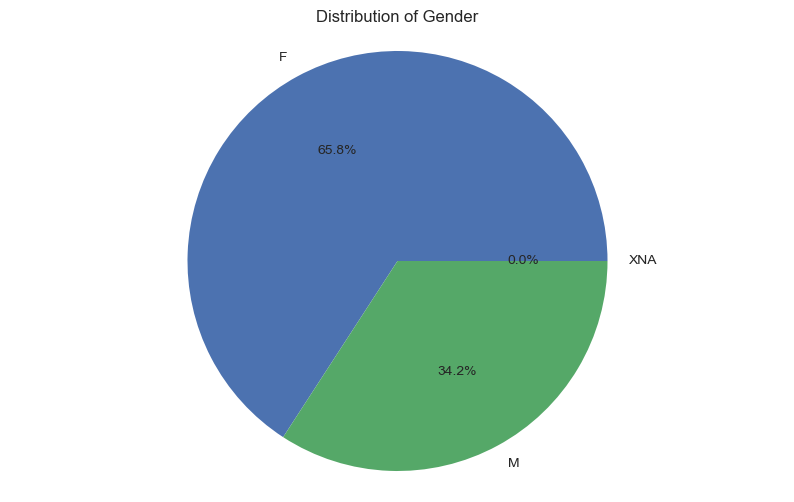

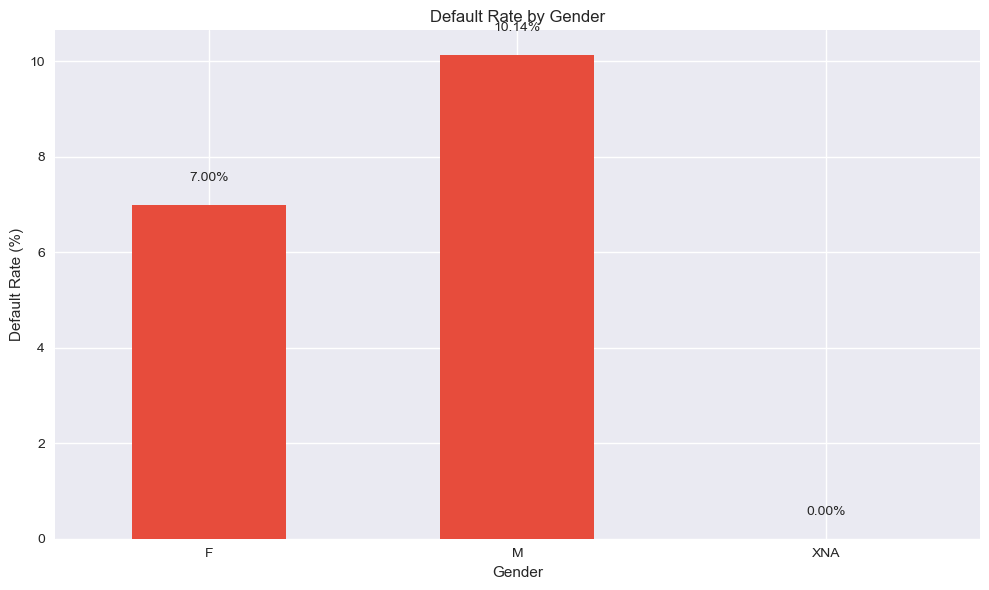

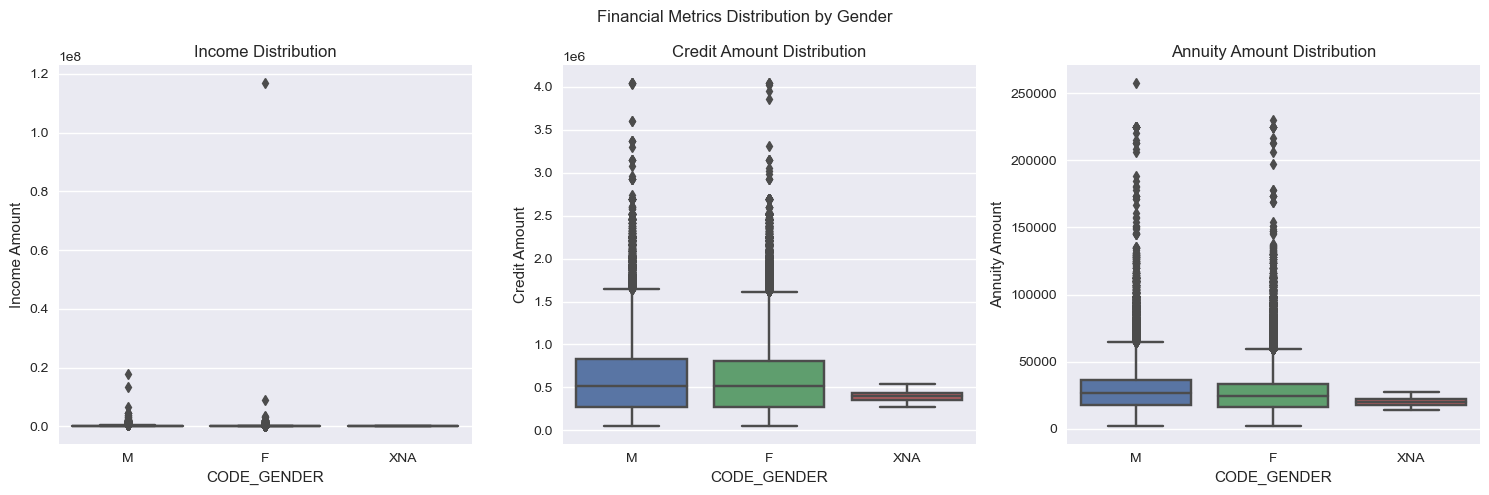

In [78]:
# Basic analysis of CODE_GENDER
print("Analysis of CODE_GENDER Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
gender_counts = cleaned_application_data['CODE_GENDER'].value_counts()
gender_percentages = (gender_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['CODE_GENDER'].unique())
print("\nValue counts:")
print(gender_counts)
print("\nPercentages:")
print(gender_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['CODE_GENDER'].isnull().sum()
print(f"\nMissing values: {missing_count}")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Gender:")
print("-" * 30)

# Calculate default rates by gender
default_by_gender = pd.crosstab(cleaned_application_data['CODE_GENDER'], 
                               cleaned_application_data['TARGET'],
                               normalize='index') * 100
print("\nDefault rates by gender (%):")
print(default_by_gender.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['CODE_GENDER'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Gender
print("\n3. Financial Analysis by Gender:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('CODE_GENDER')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by gender:")
print(financial_analysis)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Gender Distribution Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

# Figure 2: Default Rates by Gender
plt.figure(figsize=(10, 6))
default_rates = cleaned_application_data.groupby('CODE_GENDER')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=0)
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Financial Metrics Distribution by Gender')

# Income Distribution
sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0])
axes[0].set_title('Income Distribution')
axes[0].set_ylabel('Income Amount')
axes[0].tick_params(axis='x', rotation=0)

# Credit Amount Distribution
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[1])
axes[1].set_title('Credit Amount Distribution')
axes[1].set_ylabel('Credit Amount')
axes[1].tick_params(axis='x', rotation=0)

# Annuity Amount Distribution
sns.boxplot(x='CODE_GENDER', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[2])
axes[2].set_title('Annuity Amount Distribution')
axes[2].set_ylabel('Annuity Amount')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Analysis of `NAME_TYPE_SUITE` Column
- **Objective:** Explore the distribution of `NAME_TYPE_SUITE` values, examine its relationship with loan default rates (TARGET), and assess financial metrics based on suite type.

- **Steps Performed:**
  - **Basic Distribution and Missing Values:**
    - Check unique values, value counts, and percentage distribution across suite types.
    - Identify missing values and calculate their percentage within `NAME_TYPE_SUITE`.
  - **Default Analysis by Suite Type:**
    - Calculate and visualize default rates for each suite type.
    - Conducte a Chi-square test to assess the relationship between suite type and default rate.
  - **Financial Metrics Analysis:**
    - Examine financial metrics (`AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `AMT_ANNUITY`) across different suite types.
  - **Additional Analysis:**
    - Explore the relationship of suite types with other variables, including gender distribution and average credit amount.

- **Visualizations:**
  - **Bar Chart** showing the overall distribution of suite types.
  - **Bar Plot** displaying default rates by suite type, with color coding for emphasis.
  - Additional bar plot for visualizing relationships with financial metrics and other key variables.

- **Statistical Insights:**
  - **Default Rate by Suite Type:** Visualize default percentages by suite type, highlighting the suite types associated with higher risk.
  - **Chi-Square Test Result:** Validate statistical significance of suite type in relation to default rates.

- **Outcome:** This analysis provides a clearer understanding of how suite type may impact loan default rates and financial metrics, which can guide more targeted customer insights and loan risk assessment.

Analysis of NAME_TYPE_SUITE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

Value counts:
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

Percentages:
NAME_TYPE_SUITE
Unaccompanied      81.24%
Family             13.06%
Spouse, partner      3.7%
Children            1.06%
Other_B             0.58%
Other_A             0.28%
Group of people     0.09%
Name: count, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Suite Type:
------------------------------

Default rates by suite type (%):
TARGET               0     1
NAME_TYPE_SUITE             
Children         92.62  7.38
Family           92.51  7.49
Group of people  91.51  8.49

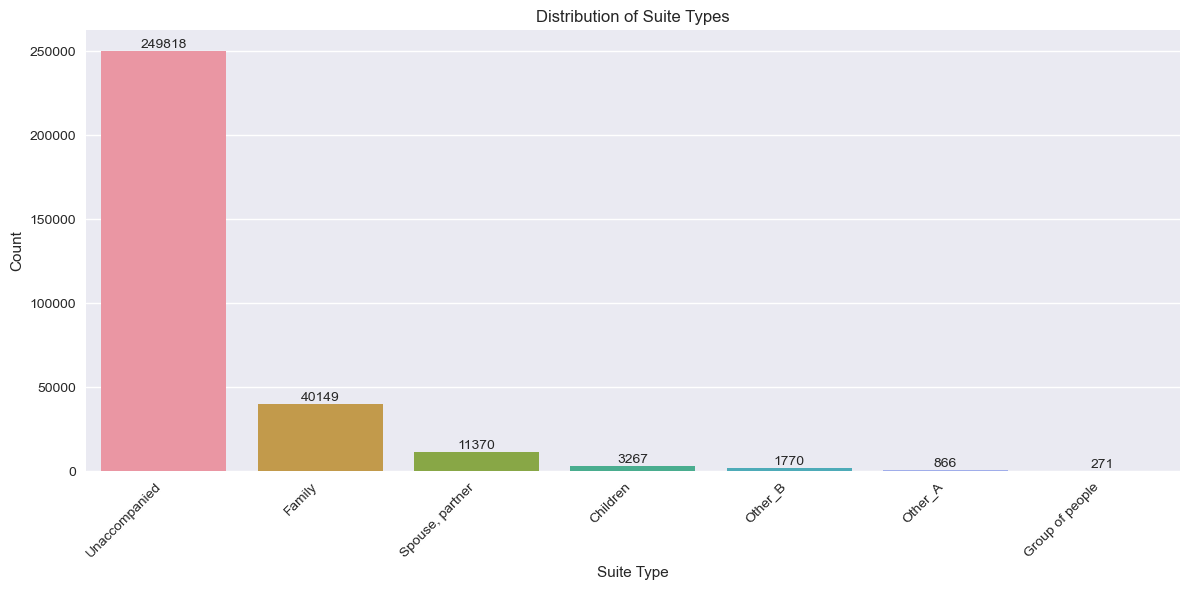

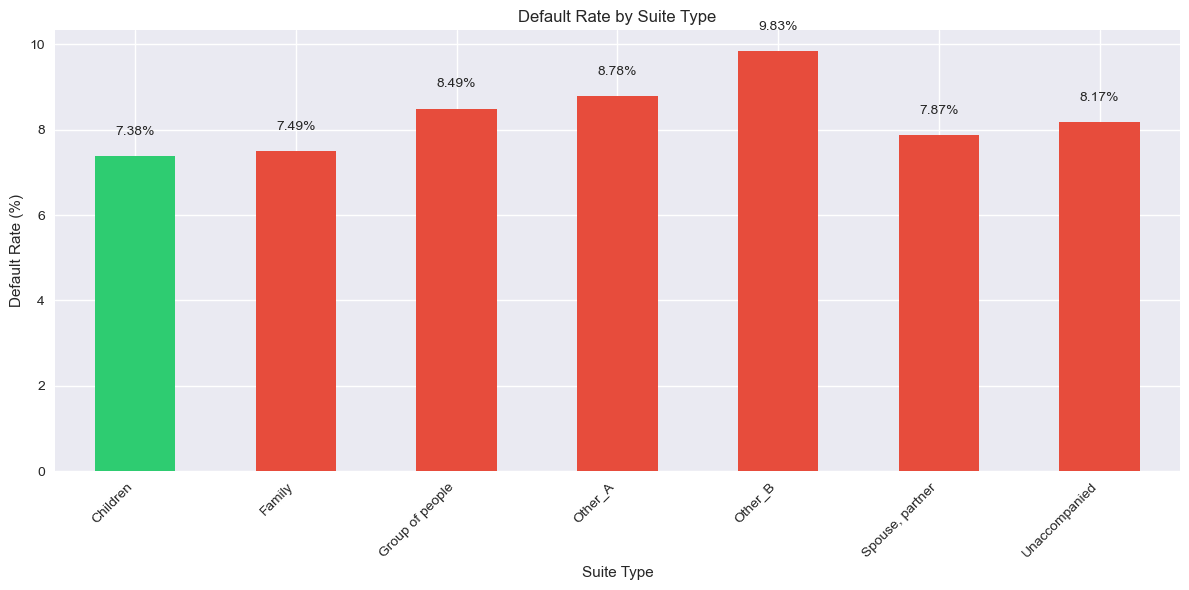


5. Relationship with Other Key Variables:
------------------------------

Gender distribution by suite type (%):
CODE_GENDER          F      M  XNA
NAME_TYPE_SUITE                   
Children         85.46  14.54  0.0
Family           68.38  31.61  0.0
Group of people  61.99  38.01  0.0
Other_A          62.24  37.76  0.0
Other_B          69.32  30.68  0.0
Spouse, partner  55.33  44.67  0.0
Unaccompanied    65.64  34.36  0.0

Average credit amount by suite type:
NAME_TYPE_SUITE
Children           580523.94
Family             619353.22
Group of people    571435.51
Other_A            581041.84
Other_B            552112.48
Spouse, partner    649443.50
Unaccompanied      594131.12
Name: AMT_CREDIT, dtype: float64


In [80]:
# Basic analysis of NAME_TYPE_SUITE
print("Analysis of NAME_TYPE_SUITE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
suite_counts = cleaned_application_data['NAME_TYPE_SUITE'].value_counts()
suite_percentages = (suite_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_TYPE_SUITE'].unique())
print("\nValue counts:")
print(suite_counts)
print("\nPercentages:")
print(suite_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_TYPE_SUITE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Suite Type:")
print("-" * 30)

# Calculate default rates by suite type
default_by_suite = pd.crosstab(cleaned_application_data['NAME_TYPE_SUITE'], 
                              cleaned_application_data['TARGET'],
                              normalize='index') * 100
print("\nDefault rates by suite type (%):")
print(default_by_suite.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_TYPE_SUITE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Suite Type
print("\n3. Financial Analysis by Suite Type:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_TYPE_SUITE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by suite type:")
print(financial_analysis)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Suite Type Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=suite_counts.index, y=suite_counts.values)
plt.title('Distribution of Suite Types')
plt.xlabel('Suite Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(suite_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Suite Type
plt.figure(figsize=(12, 6))
default_rates = cleaned_application_data.groupby('NAME_TYPE_SUITE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Suite Type')
plt.xlabel('Suite Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Additional Analysis: Correlation with other categorical variables
print("\n5. Relationship with Other Key Variables:")
print("-" * 30)

# Analyze relationship with CODE_GENDER
gender_suite_cross = pd.crosstab(cleaned_application_data['NAME_TYPE_SUITE'], 
                                cleaned_application_data['CODE_GENDER'], 
                                normalize='index') * 100
print("\nGender distribution by suite type (%):")
print(gender_suite_cross.round(2))

# Calculate average credit amount by suite type
avg_credit = cleaned_application_data.groupby('NAME_TYPE_SUITE')['AMT_CREDIT'].mean().round(2)
print("\nAverage credit amount by suite type:")
print(avg_credit)

#### Analysis of `NAME_INCOME_TYPE` Column
- **Objective:** Explore the distribution of income types, assess their relationship with loan default rates (TARGET), and examine key financial metrics across income categories.

- **Steps Performed:**
  - **Basic Distribution and Missing Values:**
    - Check unique values, value counts, and percentage distribution for `NAME_INCOME_TYPE`.
    - Identify any missing values and calculate their percentage within the column.
  - **Default Analysis by Income Type:**
    - Calculate default rates by income type, examining potential associations.
    - Conduct a Chi-square test to assess the statistical relationship between income type and default rates.
  - **Financial Metrics Analysis by Income Type:**
    - Assess financial metrics (`AMT_INCOME_TOTAL`, `AMT_CREDIT`, and `AMT_ANNUITY`) by income type.
    - Calculate additional financial ratios, such as Credit-to-Income and Annuity-to-Income ratios.
  - **Additional Analysis:**
    - Analyze relationships with other key variables, including education distribution and average age by income type.

- **Visualizations:**
  - **Bar Chart** of income type distribution.
  - **Bar Plot** for default rates by income type.
  - **Box Plots** for financial metrics distribution by income type (e.g., income, credit, annuity amounts).
  - Additional box plot visualizing Credit-to-Income ratios across income types.

- **Statistical Insights:**
  - **Default Rates by Income Type:** Identify income types associated with higher default rates, providing insights for risk assessment.
  - **Financial Ratios Analysis:** Ratios highlight financial stability differences across income types, aiding in credit evaluation.
  - **Chi-Square Test Result:** Provide statistical significance of income type associations with default rates.

- **Outcome:** This analysis offers a comprehensive view of how income types affect loan default risks, financial metrics, and key borrower characteristics, aiding financial institutions in tailoring credit policies for different income categories.

Analysis of NAME_INCOME_TYPE Column
--------------------------------------------------

1. Basic Distribution:
------------------------------
Unique values: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Value counts:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

Percentages:
NAME_INCOME_TYPE
Working                 51.63%
Commercial associate    23.29%
Pensioner                18.0%
State servant            7.06%
Unemployed               0.01%
Student                  0.01%
Businessman               0.0%
Maternity leave           0.0%
Name: count, dtype: object

Missing values: 0 (0.0%)

2. Default Analysis by Income Type:
------------------------------

Default rates by 

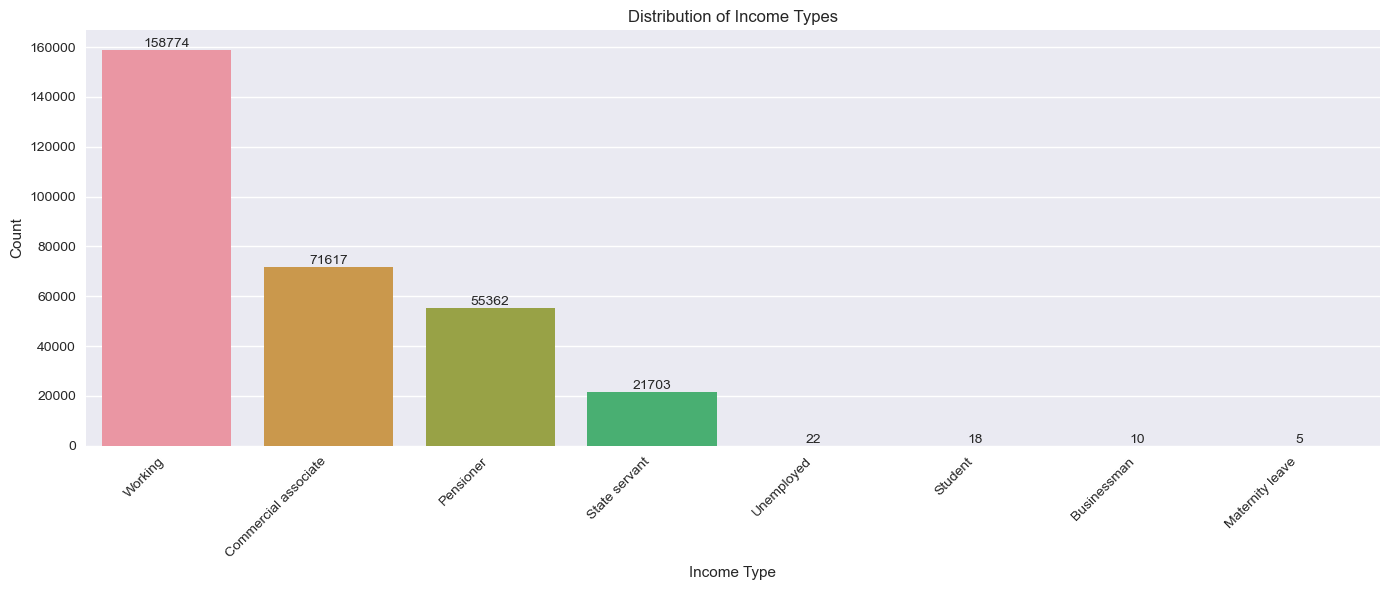

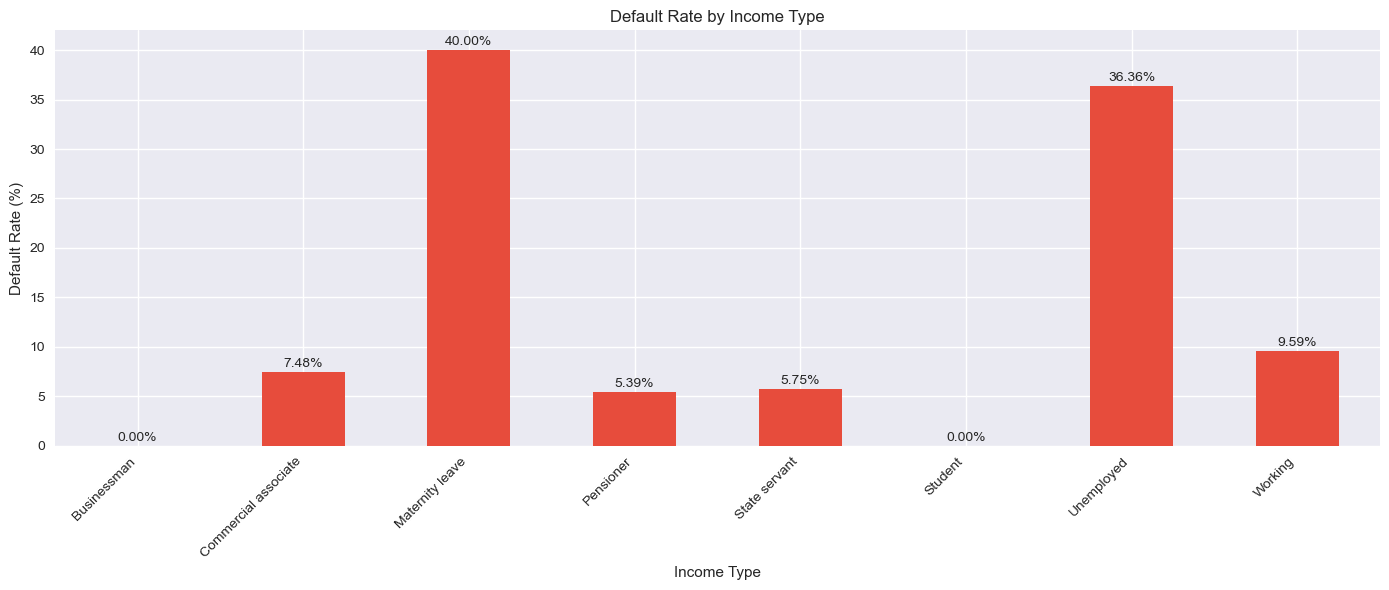

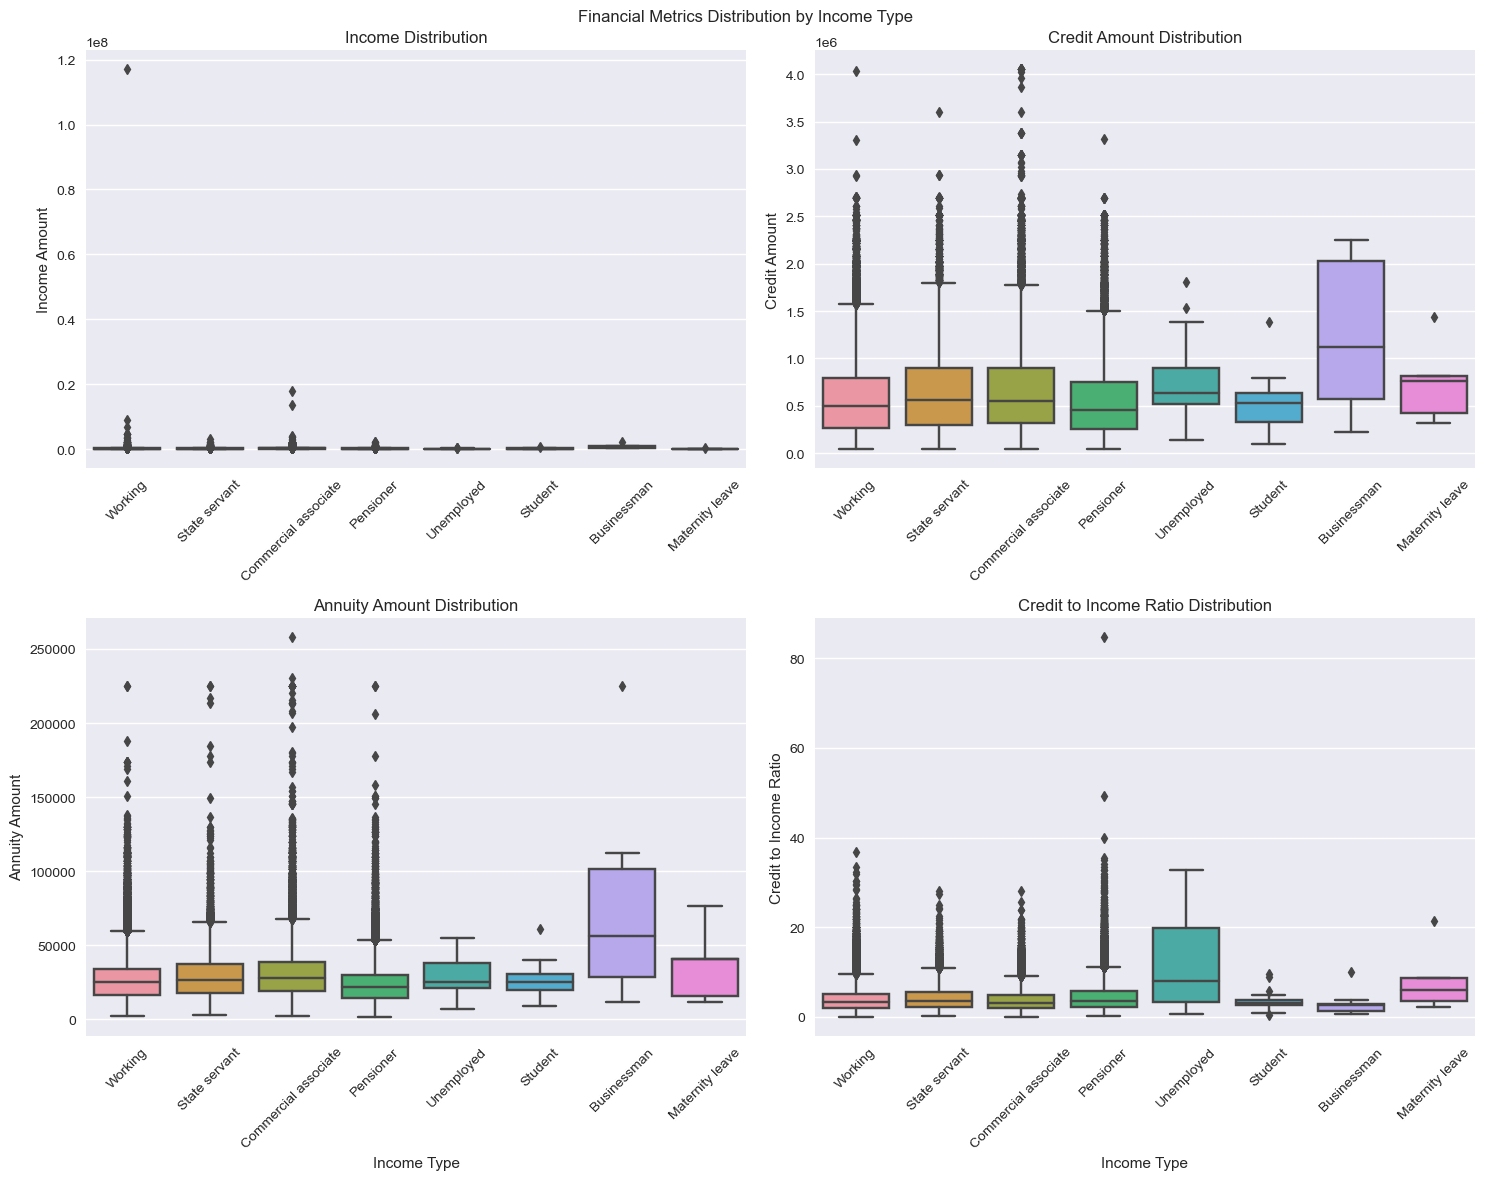


5. Additional Analysis:
------------------------------

Education distribution by income type (%):
NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_INCOME_TYPE                                                             
Businessman                      0.00            100.00               0.00   
Commercial associate             0.06             33.55               4.75   
Maternity leave                  0.00             60.00               0.00   
Pensioner                        0.05             14.79               0.94   
State servant                    0.11             40.84               3.55   
Student                          0.00             33.33               5.56   
Unemployed                       0.00             27.27              13.64   
Working                          0.05             21.26               3.52   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_INCOME_TYPE                                

In [81]:
# Basic analysis of NAME_INCOME_TYPE
print("Analysis of NAME_INCOME_TYPE Column")
print("-" * 50)

# 1. Look at unique values and basic counts
print("\n1. Basic Distribution:")
print("-" * 30)
income_type_counts = cleaned_application_data['NAME_INCOME_TYPE'].value_counts()
income_type_percentages = (income_type_counts / len(cleaned_application_data) * 100).round(2)

print("Unique values:", cleaned_application_data['NAME_INCOME_TYPE'].unique())
print("\nValue counts:")
print(income_type_counts)
print("\nPercentages:")
print(income_type_percentages.astype(str) + '%')

# 2. Missing values check
missing_count = cleaned_application_data['NAME_INCOME_TYPE'].isnull().sum()
missing_percentage = (missing_count / len(cleaned_application_data) * 100).round(2)
print(f"\nMissing values: {missing_count} ({missing_percentage}%)")

# 3. Target (Default) Analysis
print("\n2. Default Analysis by Income Type:")
print("-" * 30)

# Calculate default rates by income type
default_by_income_type = pd.crosstab(cleaned_application_data['NAME_INCOME_TYPE'], 
                                    cleaned_application_data['TARGET'],
                                    normalize='index') * 100
print("\nDefault rates by income type (%):")
print(default_by_income_type.round(2))

# Chi-square test
contingency_table = pd.crosstab(cleaned_application_data['NAME_INCOME_TYPE'], 
                               cleaned_application_data['TARGET'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"\nChi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")

# 4. Financial Analysis by Income Type
print("\n3. Financial Analysis by Income Type:")
print("-" * 30)

financial_metrics = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
financial_analysis = cleaned_application_data.groupby('NAME_INCOME_TYPE')[financial_metrics].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std')
]).round(2)

print("\nFinancial metrics by income type:")
print(financial_analysis)

# Calculate additional financial ratios
print("\nFinancial ratios by income type:")
financial_ratios = cleaned_application_data.groupby('NAME_INCOME_TYPE').agg({
    'AMT_CREDIT': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean(),
    'AMT_ANNUITY': lambda x: (x / cleaned_application_data.loc[x.index, 'AMT_INCOME_TOTAL']).mean()
}).round(3)
financial_ratios.columns = ['Credit-to-Income Ratio', 'Annuity-to-Income Ratio']
print(financial_ratios)

# 5. Visualizations
print("\n4. Creating Visualizations...")
print("-" * 30)

# Set up the plotting style
plt.style.use('seaborn')

# Figure 1: Income Type Distribution
plt.figure(figsize=(14, 6))
sns.barplot(x=income_type_counts.index, y=income_type_counts.values)
plt.title('Distribution of Income Types')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(income_type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Figure 2: Default Rates by Income Type
plt.figure(figsize=(14, 6))
default_rates = cleaned_application_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean() * 100
colors = ['#2ecc71' if x == min(default_rates) else '#e74c3c' for x in default_rates]
ax = default_rates.plot(kind='bar', color=colors)
plt.title('Default Rate by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(default_rates):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.tight_layout()
plt.show()

# Figure 3: Financial Metrics by Income Type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Metrics Distribution by Income Type')

# Income Distribution
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=cleaned_application_data, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Income Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Credit Amount Distribution
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=cleaned_application_data, ax=axes[0,1])
axes[0,1].set_title('Credit Amount Distribution')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Credit Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Annuity Amount Distribution
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', data=cleaned_application_data, ax=axes[1,0])
axes[1,0].set_title('Annuity Amount Distribution')
axes[1,0].set_xlabel('Income Type')
axes[1,0].set_ylabel('Annuity Amount')
axes[1,0].tick_params(axis='x', rotation=45)

# Credit to Income Ratio
sns.boxplot(data=cleaned_application_data, 
            x='NAME_INCOME_TYPE', 
            y=cleaned_application_data['AMT_CREDIT']/cleaned_application_data['AMT_INCOME_TOTAL'],
            ax=axes[1,1])
axes[1,1].set_title('Credit to Income Ratio Distribution')
axes[1,1].set_xlabel('Income Type')
axes[1,1].set_ylabel('Credit to Income Ratio')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional Analysis: Relationship with other variables
print("\n5. Additional Analysis:")
print("-" * 30)

# Income Type by Education
education_income_cross = pd.crosstab(cleaned_application_data['NAME_INCOME_TYPE'], 
                                   cleaned_application_data['NAME_EDUCATION_TYPE'], 
                                   normalize='index') * 100
print("\nEducation distribution by income type (%):")
print(education_income_cross.round(2))

# Average age by income type
age_by_income = cleaned_application_data.groupby('NAME_INCOME_TYPE')['DAYS_BIRTH'].mean().apply(lambda x: abs(x)/365).round(1)
print("\nAverage age by income type:")
print(age_by_income)